## RegresioÃÅn Lineal MuÃÅltiple

La regresioÃÅn lineal simple es un meÃÅtodo uÃÅtil para predecir una respuesta sobre la base de una sola variable predictora. Sin embargo, en la praÃÅctica frecuentemente se tiene maÃÅs de un predictor. Por ejemplo, en los datos de Publicidad, se examinoÃÅ la relacioÃÅn entre las ventas y la publicidad televisiva. TambieÃÅn tenemos datos de la cantidad de dinero gastado en la publicidad en la radio y en los perioÃÅdicos, y es posible que desee saber si cualquiera de estos otros dos medios de publicidad se asocia con las ventas. **¬øCoÃÅmo podemos ampliar nuestro anaÃÅlisis de los datos publicitarios para acomodar estos dos predictores adicionales?**

Una opcioÃÅn es ejecutar tres regresiones lineales sencillas separadas, cada una de las cuales utiliza un medio publicitario diferente como predictor. Por ejemplo, podemos establecer una regresioÃÅn lineal simple para predecir las ventas sobre la base de la cantidad gastada en anuncios de radio. Los resultados se muestran en la siguientes tablas:

In [3]:
# Importamos las librearias necesarias para manipular los datos
import pandas as pd # Librer√≠a que permite alamacenar los datos en tablas o dataframes como en R
import matplotlib.pyplot as plt # Librer√≠a para graficar
# Esta l√≠nea permite que aparezcan los graficos directamente en el notebook
%matplotlib inline

# Leemos los datos de un archivo en formato CSV y lo almacenamos en un DataFrame de la librear√≠a Pandas
# El archivo puede ser leido directamente de un URL en internet o localmente una vez sea descargado.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head() # Lista los primeros datos de la tabla o dataframe

# Esta es una forma estandar de importar la librer√≠a si se quiere utilizar la notaci√≥n similar que en R
import statsmodels.formula.api as smf

# Creamos el modelo y lo ajustamos en una sola l√≠nea de c√≥digo
# OLS es la funci√≥n de Ordinary Least Squeares por sus siglas en ingles del metodo de ajuste por minimos cuadrados 
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [4]:
# Modelo para Radio
estRadio = smf.ols('sales ~ radio', data).fit()
estRadio.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [5]:
# Modelo para Peri√≥dico
estNP = smf.ols('sales ~ newspaper', data).fit()
estNP.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [6]:
print("Cantidad de unidades vendidas - Radio: ",estRadio.params[1]*1000)
print("Cantidad de unidades vendidas - Peri√≥dico: ",estNP.params[1]*1000)

Cantidad de unidades vendidas - Radio:  202.495783392
Cantidad de unidades vendidas - Peri√≥dico:  54.6930984723


Encontramos que un aumento de 1,000 dolares en el gasto en publicidad de radio se asocia con un aumento en ventas de alrededor de 203 unidades. La tabla de resultados anterior contiene los coeficientes de miÃÅnimos cuadrados para una simple regresioÃÅn lineal de las ventas en el presupuesto de publicidad en los perioÃÅdicos. Un aumento de $1,000 en el presupuesto de publicidad en los perioÃÅdicos se asocia con un aumento en las ventas de aproximadamente 55 unidades.

Sin embargo, **el enfoque de ajustar un modelo de regresioÃÅn lineal simple por separado para cada predictor no es del todo satisfactorio**. En primer lugar, no estaÃÅ claro coÃÅmo hacer una sola prediccioÃÅn de las ventas dados los niveles de los tres presupuestos de medios de publicidad, ya que cada uno de los presupuestos se asocia con una ecuacioÃÅn de regresioÃÅn por separado. En segundo lugar, _cada una de las tres ecuaciones de regresioÃÅn ignora los otros dos medios al obtener estimaciones para los coeficientes de regresioÃÅn_. _**MaÃÅs adelante se veraÃÅ que si los presupuestos de los medios de publicidad estaÃÅn correlacionados entre siÃÅ en los 200 mercados que constituyen nuestro conjunto de datos, entonces podemos llegar a estimaciones muy enganÃÉosas de los efectos individuales de los medios sobre las ventas.**_

En lugar de ajustar un modelo de regresioÃÅn lineal simple por separado para cada predictor, una mejor aproximacioÃÅn es extender el modelo de regresioÃÅn lineal simple para que pueda utilizar directamente muÃÅltiples predictores. Podemos hacer esto dando a cada predictor un coeficiente de pendiente separado en un solo modelo. En general, supongamos que tenemos p predictores distintos. Entonces el modelo de regresioÃÅn lineal muÃÅltiple toma la forma:

$$y = \beta_0 + \beta_1x_1 + + \beta_2x_2 +... + \beta_px_p + \epsilon$$

Donde $X_j$ representa la j-eÃÅsima predictora y $B_j$ cuantifica la asociacioÃÅn entre esa variable y la respuesta. Interpretamos $B_j$ como el efecto promedio sobre $Y$ de un aumento de una unidad en $X_j$, manteniendo fijos todos los demaÃÅs predictores. En el ejemplo de publicidad, el modelo seriÃÅa:

$$y = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$



In [68]:
# Cuales son los valores min/max de las variables?
# Estos valores se pueden utilizar mas adelante para uno de los graficos en 3D
data[['radio', 'TV', 'newspaper']].describe()

radio          TV   newspaper
count  200.000000  200.000000  200.000000
mean    23.264000  147.042500   30.554000
std     14.846809   85.854236   21.778621
min      0.000000    0.700000    0.300000
25%      9.975000   74.375000   12.750000
50%     22.900000  149.750000   25.750000
75%     36.525000  218.825000   45.100000
max     49.600000  296.400000  114.000000

### EstimacioÃÅn de los Coeficientes de RegresioÃÅn

In [12]:
# Creamos un modelo con todos los predictores
lm2 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
# Visualizamos los coeficientes
lm2.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

**Como interpretamos estos coeficientes?**
Para un aumento en gastos de publicidad dado en Radio y Prensa, y un incremento en publicidad de $1000 en TV esta asociado con un incremento en ventas de 46 unidades.

Mayor informaci√≥n puede ser revisada en el resumen del modelo, que se presenta a continuaci√≥n:

In [56]:
# resumen del modelo ajustado
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 22 Oct 2017   Prob (F-statistic):           1.58e-96
Time:                        11:11:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La tabla muestra las estimaciones de los coeficientes de la regresioÃÅn muÃÅltiple cuando se usan presupuestos para publicidad en televisioÃÅn, radio y perioÃÅdicos para predecir las ventas de productos, usando los datos de Publicidad. Interpretamos estos resultados de la siguiente manera: para una cantidad fija (dada) de publicidad en TV y perioÃÅdicos, un gasto adicional de $1,000 en publicidad por radio produce un aumento en las ventas de aproximadamente 189 unidades.

Al comparar estas estimaciones de coeficientes con las mostradas en las ortas tablas anteriores, observamos que las estimaciones de los coeficientes de regresioÃÅn muÃÅltiple para TV y radio son bastante similares a las estimaciones del coeficiente de regresioÃÅn lineal simple. Sin embargo, mientras que la estimacioÃÅn del coeficiente de regresioÃÅn del gasto en publicidad en perioÃÅdicos era significativamente diferente de cero, su estimacioÃÅn en el modelo de regresioÃÅn muÃÅltiple es cercana a cero, y el p-valor correspondiente ya no es significativo, con un valor alrededor de 0.86.

Esto ilustra que los **coeficientes de la regresioÃÅn simple y de regresioÃÅn muÃÅltiple pueden ser muy diferentes**. Esta diferencia se deriva del hecho de que en el caso de regresioÃÅn simple, el teÃÅrmino de pendiente representa el efecto promedio de un aumento de 1,000 en la publicidad en los perioÃÅdicos, ignorando otros predictores como la televisioÃÅn y la radio. Por el contrario, en el ajuste de regresioÃÅn muÃÅltiple, el coeficiente para el perioÃÅdico representa el efecto promedio del aumento del gasto de publicidad en los perioÃÅdicos en 1,000 mientras se mantiene fijo el gasto en televisioÃÅn y radio, es decir, teniendo en cuenta la presencia del gasto en televisioÃÅn y radio.

###¬†Estimaci√≥n de los coeficientes utilizando scikit-learn

A diferencia de las estimaciones de la regresioÃÅn lineal simple dadas anteriormente, las estimaciones de los coeficientes de la regresioÃÅn muÃÅltiple tienen formas algo complicadas las cuales se presentan maÃÅs faÃÅcilmente usando _aÃÅlgebra matricial_. Por esta razoÃÅn, no los proporcionamos aquiÃÅ y hacemos uso de las librer√≠as pre-existentes.

La siguiente figura ilustra un ejemplo del ajuste de miÃÅnimos cuadrados a un conjunto de datos con p = 2 predictores.

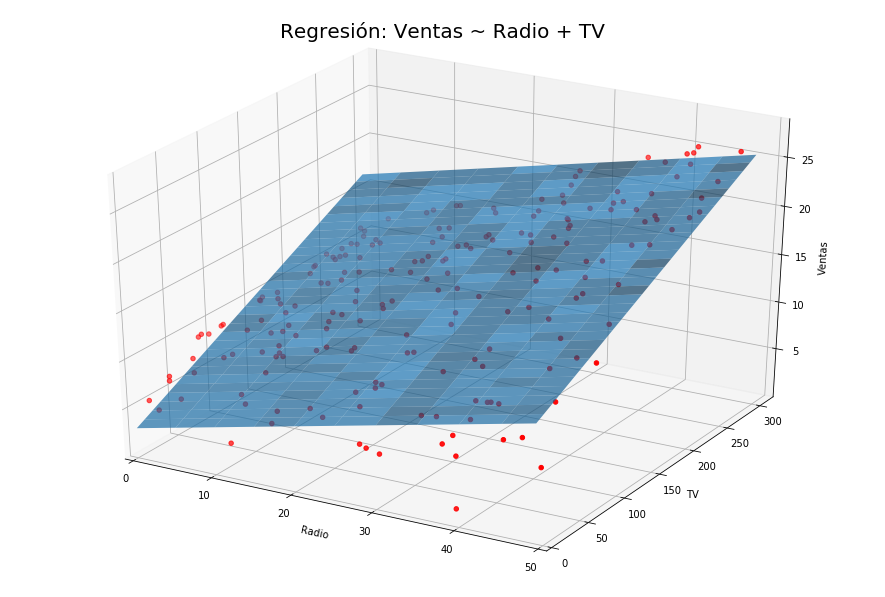

In [448]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

regr = skl_lm.LinearRegression()

X = data[['radio', 'TV']].as_matrix()
y = data.sales

regr.fit(X,y)

# Crear una cuadricula de coordenadas
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])
        
# Create plot
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Regresi√≥n: Ventas ~ Radio + TV', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.7)
ax.scatter3D(data.radio, data.TV, data.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Ventas')

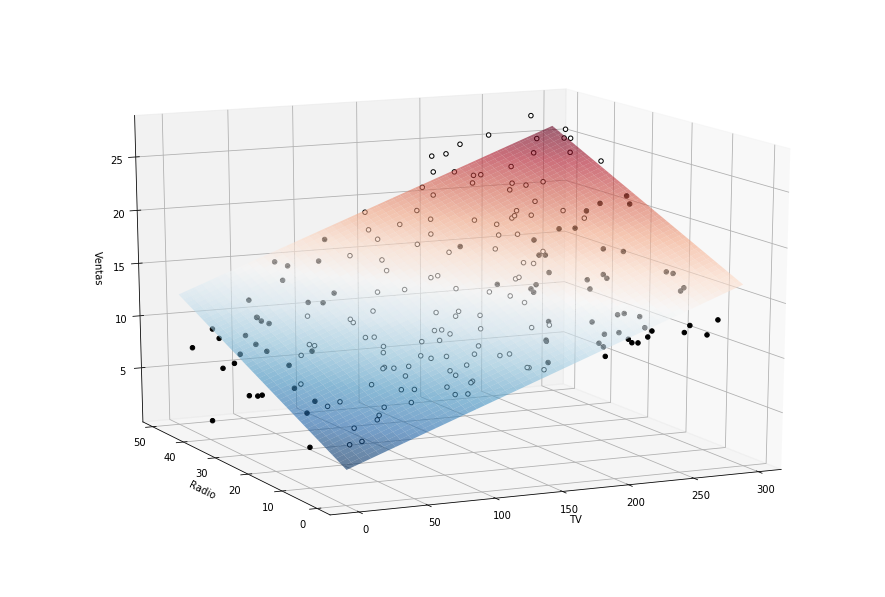

In [449]:
import statsmodels.api as sm

X = data[['TV', 'radio']]
y = data['sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.radio.min(), X.radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = axes3d.Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Ventas')

In [36]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

regr = skl_lm.LinearRegression()

X = data[['radio', 'TV']].as_matrix()
y = data.sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 0.18799423  0.04575482]
2.92109991241


In [40]:
# Emparejar los nombres con los coeficientes
zip(["radio","TV"], regr.coef_)

In [42]:
# Predecir algunas nuevas observaciones
#regr.predict([100, 25, 25])
# calculate R2
regr.score(X, y)

0.89719426108289557

Note que los **intervalos de confianza** y los **p-valores** no son facilmente accesibles a trav√©z de scikit-learn

**_¬øTiene sentido que la regresioÃÅn muÃÅltiple sugiera que no hay relacioÃÅn entre ventas y la publicidad en perioÃÅdicos mientras que la regresioÃÅn lineal simple implica lo contrario?**_ 

Considere la **matriz de correlacioÃÅn** para las tres variables predictoras y la variable respuesta, que se muestran en la siguiente tabla. Observe que la correlacioÃÅn entre la radio y el perioÃÅdico es 0.35. **Esto revela una tendencia a gastar maÃÅs en publicidad en los perioÃÅdicos en los mercados donde se gasta maÃÅs en publicidad por radio**. Supongamos que la regresioÃÅn muÃÅltiple es correcta y que la publicidad en los perioÃÅdicos no tiene un impacto directo en las ventas, pero que la publicidad por radio siÃÅ aumenta las ventas. Luego, en los mercados donde gastamos maÃÅs en radio, las ventas tenderaÃÅn a ser maÃÅs altas y, como muestra la matriz de correlaciones, en esos mismos mercados se tiende a gastar maÃÅs en publicidad en los perioÃÅdicos. Por lo tanto, en una simple regresioÃÅn lineal que soÃÅlo examina las ventas frente al gasto en publicidad en los perioÃÅdicos, observaremos que los valores maÃÅs altos de la publicidad en perioÃÅdicos tienden a estar asociados con valores maÃÅs altos de ventas, aunque la publicidad en los perioÃÅdicos no afecta realmente a las ventas. De esta manera, las ventas por perioÃÅdicos son un sustituto del efecto de la publicidad radial; PerioÃÅdico se gana el "creÃÅdito" por el efecto de la radio en las ventas.

>Este resultado ligeramente contraintuitivo es muy comuÃÅn en muchas situaciones de la vida real. Considere un ejemplo absurdo para ilustrar el punto. La realizacioÃÅn de una regresioÃÅn del nuÃÅmero de ataques de tiburoÃÅn versus las ventas de helado para los datos recolectados en una comunidad playera durante un periÃÅodo de tiempo mostrariÃÅa una relacioÃÅn positiva, similar a la vista entre las ventas y el perioÃÅdico. Por supuesto nadie (auÃÅn) ha sugerido que los helados deben ser prohibidos en las playas para tratar de reducir los ataques de los tiburones. En realidad, las temperaturas maÃÅs altas hacen que maÃÅs personas visiten la playa, lo que a su vez resulta en maÃÅs ventas de helados y maÃÅs ataques de tiburones. Una regresioÃÅn muÃÅltiple de los ataques frente a las ventas de helado y la temperatura revela que, como lo indica la intuicioÃÅn, el _predictor anterior ya no es significativo despueÃÅs de ajustar por la temperatura_.

### Matriz de correlaci√≥n

In [10]:
data.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

###¬†Otra forma de ver las relaciones graficamete

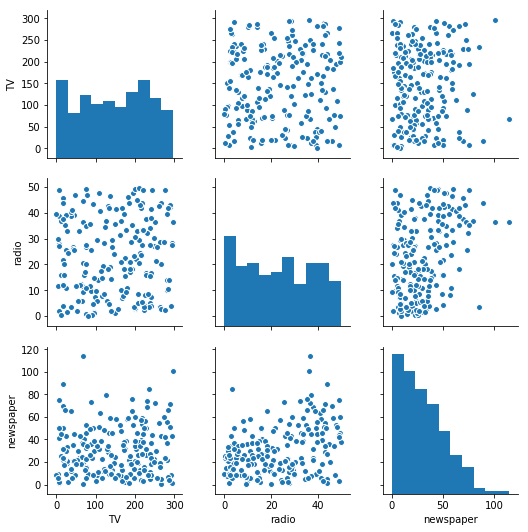

In [73]:
sns.pairplot(data[['TV','radio','newspaper']]);

**Podemos encontrar algunas cosas como:**

- TV y radio tienen p-valores significantes, mientras que peri√≥dico no. Asi nosotros rechazamos la hip√≥tesis nula para TV y Radio (_Osea que no hay asociaci√≥n entre estas variables y las ventas_), y falla para rechazar la hip√≥tesis nula para Peri√≥dico.

- Los gastos en p√∫blicidad para TV y Radio son ambos asociados positivamente con las ventas, donde el gasto en publicidad en peri√≥dico es ligeramente asociado negativamente con las ventas. Sin embargo, esto es irrelevante desde que nosotros rechazamos la hip√≥tesis nula para peri√≥dico.

- Este modelo tiene un valor m√°s alto de $R^2$ (0.897) que el modelo anterior, lo que significa que este modelo provee un mejor ajutste a los datos que el modelo que solamente incluye TV como variable predictora.


###¬†Algunas Preguntas Importantes

Cuando realizamos una regresioÃÅn lineal muÃÅltiple, por lo general estamos interesados en responder a algunas preguntas importantes.
1. ¬øEs al menos uno de los predictores X1, X2,. . . , Xp uÃÅtil en la prediccioÃÅn de la respuesta?
2. ¬øTodos los predictores ayudan a explicar Y, o soÃÅlo un subconjunto de los predictores es
uÃÅtil?
3. ¬øQueÃÅ tan bien el modelo ajusta a los datos?
4. Dado un conjunto de valores predictores, ¬øcuaÃÅl es valor predicho de la respuesta, y queÃÅ tan precisa es la prediccioÃÅn?

A continuacioÃÅn abordamos cada una de estas preguntas.


### ¬øExiste una relacioÃÅn entre la respuesta y los predictores?

Recuerde que en el ajuste de la regresioÃÅn lineal simple, para determinar si existe una relacioÃÅn entre la respuesta y el predictor simplemente se puede verificar si Œ≤1 = 0. En el ajuste de regresioÃÅn muÃÅltiple con p predictores, necesitamos preguntar si todos los coeficientes de regresioÃÅn son cero, es decir, si Œ≤1 = Œ≤2 = ¬∑ ¬∑ ¬∑ = Œ≤p = 0. Como en el ajuste de regresioÃÅn lineal simple, se utiliza una prueba de hipoÃÅtesis para responder a esta pregunta. Probamos la hipoÃÅtesis nula.

$$ H_0: \beta_1 = \beta_2 = ... = \beta_p = 0 $$

versus la alternativa $H_a$: al menos un $\beta_j$ no es cero.

Esta prueba de hipoÃÅtesis se realiza calculando el **estadiÃÅstico F**:

$$ F = \frac{ (TSS - RSS)/p}{RSS / (n-p-1)} $$

donde 

$$ TSS = \sum_{i=1}^n (y_i - \bar y)^2 $$

$$ RSS = \sum_{i=1}^n (y_i - \hat y_i)^2 $$

Si los supuestos del modelo lineal son correctos, se puede probar que E{RSS/(n ‚àí p ‚àí 1)} = œÉ2 y que, dado que Ho es cierto, E{(TSS ‚àí RSS)/p} = œÉ2.

>Por lo tanto, cuando no hay relacioÃÅn entre la respuesta y los predictores, se esperariÃÅa que el estadiÃÅstico F asumiera un valor cercano a 1. Por otro lado, si Ha es verdadera, entonces E {(TSS - RSS) / p}> œÉ2, por lo que se esperariÃÅa que F sea mayor que 1.

El **estadiÃÅstico F** para el modelo de regresioÃÅn lineal muÃÅltiple obtenido por la regresioÃÅn de las ventas sobre los gastos en publicidad en radio, televisioÃÅn y perioÃÅdicos se muestran en la siguiente tabla:

In [506]:
lm2.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

En este ejemplo, el estadiÃÅstico F es 570. Dado que es mucho mayor que 1, hay evidencia convincente contra la hipoÃÅtesis nula H0. En otras palabras, el estadiÃÅstico F sugiere que al menos uno de los medios publicitarios debe estar relacionado con las ventas. Sin embargo, ¬øqueÃÅ pasariÃÅa si el estadiÃÅstico F estuviera maÃÅs cerca de 1? ¬øQueÃÅ tamanÃÉo debe tener el estadiÃÅstico F antes de rechazar H0 y concluir que hay una relacioÃÅn? Resulta que la respuesta depende de los valores de n y p. Cuando n es grande, un estadiÃÅstico F que es soÃÅlo un poco maÃÅs grande que 1 auÃÅn podriÃÅa proporcionar evidencia contra H0.

En contraste, un estadiÃÅstico F maÃÅs grande es necesario para rechazar H0 si n es pequenÃÉo. Cuando H0 es verdadera y los _errores tienen una distribucioÃÅn normal_, el estadiÃÅstico F sigue una distribucioÃÅn F. Para cualquier valor dado de n y p, cualquier paquete de software estadiÃÅstico puede usarse para calcular el p-valor asociado con el estadiÃÅstico F utilizando esta distribucioÃÅn. Basado en este p-valor, podemos determinar si rechazamos o no H0. Para los datos de publicidad, el p-valor asociado al estadiÃÅstico F en la Tabla 1.6 es esencialmente cero, por lo que tenemos evidencia extremadamente fuerte de que al menos uno de los medios de publicidad se asocia con el aumento de las ventas.

Teniendo en cuenta estos p-valores individuales para cada variable, ¬øpor queÃÅ tenemos que mirar al estadiÃÅstico F? DespueÃÅs de todo, parece probable que si alguno de los p-valores de las variables individuales es muy pequenÃÉo, _al menos uno de los predictores estaÃÅ relacionado con la respuesta_. Sin embargo, esta loÃÅgica es defectuosa, especialmente cuando el _nuÃÅmero de predictores p es grande_.


Por lo tanto, si se utilizan los estadiÃÅsticos t individuales y los p-valores asociados para decidir si existe o no una asociacioÃÅn entre las variables y la respuesta, existe una probabilidad muy alta de que se concluya erroÃÅneamente de que existe una relacioÃÅn. Sin embargo, el estadiÃÅstico F no sufre de este problema, ya que se ajusta por el nuÃÅmero de predictores.

El enfoque de usar un estadiÃÅstico F para probar cualquier asociacioÃÅn entre los predictores y la respuesta funciona cuando _p es relativamente pequenÃÉo y realmente pequenÃÉo comparado con n_. Sin embargo, a veces tenemos un gran nuÃÅmero de variables. Si p> n entonces hay maÃÅs coeficientes Œ≤j para estimar que observaciones con las cuales estimarlos. En este caso, ni siquiera podemos ajustar el modelo de regresioÃÅn lineal muÃÅltiple usando miÃÅnimos cuadrados, por lo que no se puede utilizar el estadiÃÅstico F, ni tampoco la mayoriÃÅa de los otros conceptos que hemos visto hasta ahora en este capiÃÅtulo. Cuando p es grande, se pueden usar algunos de los enfoques discutidos en la siguiente seccioÃÅn, como la _seleccioÃÅn hacia adelante_. Este ajuste de _alta dimensionalidad_ se discutiraÃÅ despueÃÅs.

###¬†La decisioÃÅn sobre las variables que son importantes

Como se discutioÃÅ en la seccioÃÅn anterior, el primer paso en un anaÃÅlisis de regresioÃÅn muÃÅltiple es calcular el estadiÃÅstico F y examinar el p-valor asociado. Si concluimos sobre la base de ese p-valor que al menos uno de los predictores estaÃÅ relacionado con la respuesta, entonces es natural preguntarse cuaÃÅles predictores son los culpables? PodriÃÅamos mirar los p-valores individuales, pero como se discutioÃÅ, si p es grande, es probable que hagamos algunos _descubrimientos falsos_. Es posible que todos los predictores esteÃÅn asociados con la respuesta, pero es _maÃÅs frecuente que la respuesta soÃÅlo esteÃÅ relacionada con un subconjunto de los predictores_. La tarea de determinar queÃÅ predictores estaÃÅn asociados con la respuesta, con el fin de ajustar un modelo uÃÅnico que involucre soÃÅlo aquellos predictores, se conoce como la _**seleccioÃÅn de variables**_. AquiÃÅ soÃÅlo proporcionaremos un breve esbozo de algunos enfoques claÃÅsicos.

Idealmente, nos gustariÃÅa realizar una seleccioÃÅn de variables probando una gran cantidad de modelos diferentes, cada uno de los cuales contiene un subconjunto diferente de los predictores. Por ejemplo, si p=2, entonces podemos considerar cuatro modelos: (1) un modelo que no contenga variables, (2) un modelo que contenga soÃÅlo X1, (3) un modelo que contenga soÃÅlo X2 y (4) un modelo que contenga ambos X1 y X2. A continuacioÃÅn, podemos seleccionar el mejor modelo de todos los modelos que hemos considerado.

¬øCoÃÅmo se determina cuaÃÅl modelo es el mejor? Se pueden utilizar varios estadiÃÅsticos para juzgar la calidad de un modelo. Estos incluyen el ** estadiÃÅstico Cp de Mallows, el criterio de informacioÃÅn de Akaike (AIC), el criterio de informacioÃÅn bayesiano (BIC) y el R2 ajustado**. TambieÃÅn podemos determinar queÃÅ modelo es el mejor graficando varios resultados del modelo, tales como los residuos, para buscar patrones.

Desafortunadamente, hay un total de $2^p$ modelos que contienen subconjuntos de p variables. Esto significa que incluso para p moderado, probar cada posible subconjunto de los predictores es inviable. Por ejemplo, vimos que si p = 2, entonces hay $2^2$ = 4 modelos que considerar. Pero si p=30, entonces debemos considerar $2^{30} = 1.073.741.824$ modelos! y esto no es praÃÅctico. Por lo tanto, a menos que p sea muy pequenÃÉo, no podemos considerar todos los $2^p$ modelos, y en su lugar necesitamos un enfoque automatizado y eficiente para elegir un conjunto maÃÅs pequenÃÉo de modelos a considerar. Existen tres enfoques claÃÅsicos para esta tarea:

- **SeleccioÃÅn hacia adelante**. Comenzamos con el modelo nulo, es decir, un modelo que contiene un intercepto pero no predictores. A continuacioÃÅn, se ajustan p regresiones simples lineales y se anÃÉade al modelo nulo la variable que da como resultado el RSS maÃÅs bajo. Luego anÃÉadimos a ese modelo la variable que da como resultado el RSS maÃÅs bajo para el nuevo modelo de dos variables. Este enfoque se continuÃÅa hasta que se cumple alguna regla de detencioÃÅn.

- **SeleccioÃÅn hacia atraÃÅs**. Comenzamos con todas las variables del modelo y eliminamos la variable con el mayor p-valor, es decir, la variable que es menos significativa desde el punto de vista estadiÃÅstico. El nuevo modelo con (p-1) variables se ajusta y se elimina la variable con el mayor p-valor. Este procedimiento continuÃÅa hasta que se alcanza una regla de detencioÃÅn. Por ejemplo, podemos detener el proceso cuando todas las variables restantes tienen un p-valor por debajo de cierto umbral.

- **SeleccioÃÅn mixta**. Esta es una combinacioÃÅn de seleccioÃÅn hacia adelante y hacia atraÃÅs. Comenzamos sin variables en el modelo, y como con la seleccioÃÅn de seleccioÃÅn hacia adelante, agregamos la variable que proporciona el mejor ajuste. Continuamos agregando variables una por una. Por supuesto, como hemos observado con el ejemplo de publicidad, los p-valores para las variables pueden llegar a ser maÃÅs grandes a medida que se agregan nuevos predictores al modelo. Por lo tanto, si en cualquier punto el p-valor para una de las variables en el modelo se eleva por encima de cierto umbral, entonces eliminamos esa variable del modelo. Continuamos realizando estos pasos hacia adelante y hacia atraÃÅs hasta que todas las variables del modelo tengan un p-valor lo suficientemente bajo, y todas las variables fuera del modelo tendriÃÅan un gran p-valor si se anÃÉadieran al modelo.

La seleccioÃÅn hacia atraÃÅs no se puede usar si p>n, mientras que la seleccioÃÅn hacia adelante siempre se puede usar. La seleccioÃÅn hacia adelante es un enfoque ambicioso, y al comienzo puede incluir variables que luego se vuelven redundantes. La seleccioÃÅn mixta puede remediar esto.

In [242]:
# Incluyendo solo TV y Radio en el modelo
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.89719426108289568

In [243]:
# Incluyendo TV, Radio y peri√≥dico en el modelo (El cual creemos no tiene asociacion fuerte con las ventas)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.89721063817895219

In [245]:
# Visualizar los p-valor para los coeficientes del modelo
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

###¬†El Ajuste del Modelo

Dos de las medidas numeÃÅricas maÃÅs comunes de ajuste de modelo son el RSE y $R^2$, la fraccioÃÅn de varianza explicada. Estas cantidades se calculan e interpretan de la misma manera que para la regresioÃÅn lineal simple.

Recuerde que en la regresioÃÅn simple, $R^2$ es el cuadrado de la correlacioÃÅn de la respuesta y la variable. En la regresioÃÅn lineal muÃÅltiple, el $R^2$ es igual a la $Cor(Y ,\hat Y)^2$, el cuadrado de la correlacioÃÅn entre la respuesta y el modelo lineal ajustado; de hecho, una propiedad del modelo lineal ajustado por miÃÅnimos cuadrados es que maximiza esta correlacioÃÅn entre todos los modelos lineales posibles.

Un valor de $R^2$ cercano a 1 indica que el modelo explica una gran parte de la varianza en la variable de respuesta. Como ejemplo, vimos que para los datos de publicidad, el modelo que utiliza los tres medios publicitarios para predecir las ventas tiene un $R^2$ de 0.8972. Por otro lado, el modelo que utiliza soÃÅlo la televisioÃÅn y la radio para predecir las ventas tiene un valor $R^2$ de 0.89719. En otras palabras, hay un pequenÃÉo aumento en $R^2$ si incluimos la publicidad de perioÃÅdicos en el modelo que ya contiene publicidad en televisioÃÅn y radio, aunque vimos anteriormente que el p-valor para la publicidad de perioÃÅdicos no es significativo. **Resulta que $R^2$ aumentaraÃÅ siempre cuando se agreguen maÃÅs variables al modelo, incluso si esas variables soÃÅlo estaÃÅn deÃÅbilmente asociadas con la respuesta.**

Esto se debe al hecho de que la adicioÃÅn de otra variable a las ecuaciones de miÃÅnimos cuadrados debe permitirnos ajustar los datos de entrenamiento (aunque no necesariamente los datos de prueba) con mayor precisioÃÅn. Por lo tanto, el estadiÃÅstico $R^2$, que tambieÃÅn se calcula en los datos de entrenamiento, debe aumentar. El hecho de que la adicioÃÅn de publicidad en los perioÃÅdicos al modelo que soÃÅlo contiene publicidad en la televisioÃÅn y en la radio produce soÃÅlo un pequenÃÉo incremento en $R^2$ proporciona pruebas adicionales de que el perioÃÅdico puede ser eliminado del modelo. Esencialmente, el perioÃÅdico no proporciona una mejora real en el ajuste del modelo a las muestras de entrenamiento, y su inclusioÃÅn probablemente daraÃÅ lugar a malos resultados en las muestras de prueba independientes debido al sobreajuste.

Por el contrario, el modelo que conteniÃÅa soÃÅlo TV como predictor teniÃÅa un R2 de 0.61. La adicioÃÅn de radio al modelo conduce a una mejora sustancial en $R^2$. Esto implica que un modelo que usa los gastos de televisioÃÅn y radio para predecir las ventas es sustancialmente mejor que uno que usa soÃÅlo publicidad en televisioÃÅn. PodriÃÅamos cuantificar esta mejora mirando el p-valor para el coeficiente de radio en un modelo que contiene soÃÅlo TV y radio como predictores.

El modelo que contiene soÃÅlo TV y radio como predictores tiene un RSE de 1.681, y el modelo que tambieÃÅn contiene el perioÃÅdico como predictor tiene un RSE de 1.686!. Por el contrario, el modelo que contiene soÃÅlo TV tiene un RSE de 3.26. Esto corrobora nuestra conclusioÃÅn anterior de que un modelo que usa los gastos de televisioÃÅn y radio para predecir las ventas es mucho maÃÅs preciso (en los datos de entrenamiento) que uno que soÃÅlo usa el gasto en televisioÃÅn.

AdemaÃÅs, dado que los gastos de televisioÃÅn y radio se utilizan como predictores, tampoco tiene sentido utilizar el gasto de los perioÃÅdicos como predictor en el modelo. Es importante preguntarse coÃÅmo el RSE puede aumentar cuando el perioÃÅdico se anÃÉade al modelo dado que la RSS debe disminuir. En general el RSE se define como:

$$ RSE = \sqrt{ \frac{1}{n - p - 1} RSS } $$

la cual se simplifica la anterior ecuaci√≥n para una regresioÃÅn lineal simple. Por lo tanto, los modelos con maÃÅs variables pueden tener mayor RSE si la disminucioÃÅn en RSS es pequenÃÉa en relacioÃÅn con el aumento en p.

AdemaÃÅs de mirar los estadiÃÅsticos RSE y $R^2$ (ajustado), puede ser uÃÅtil graficar los datos. ** Los resuÃÅmenes graÃÅficos pueden revelar problemas en el modelo que no son visibles desde los valores obtenidos por los estadiÃÅsticos**.

Por ejemplo, la siguiente figura muestra un graÃÅfico tridimensional de TV y radio versus ventas. Se observa que algunos datos estaÃÅn por encima y algunas otras observaciones estaÃÅn por debajo del plano de regresioÃÅn de miÃÅnimos cuadrados. En particular, el modelo lineal parece sobreestimar las ventas en los casos en que la mayor parte del dinero publicitario se gastoÃÅ exclusivamente en televisioÃÅn o radio. Subestima las ventas para los casos en que el presupuesto se dividioÃÅ entre los dos medios de comunicacioÃÅn.


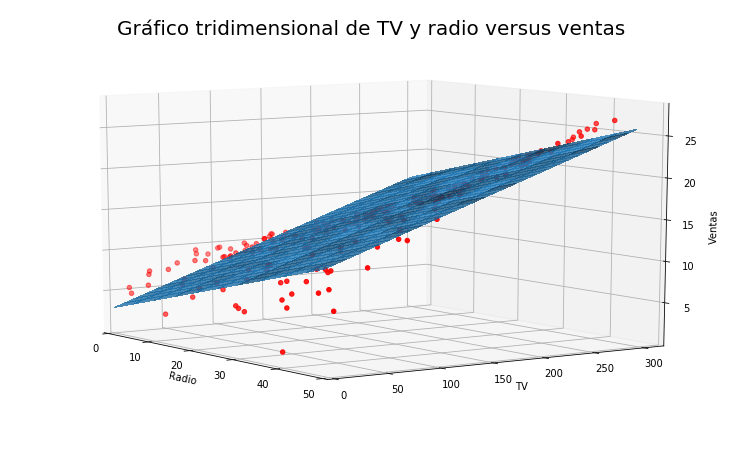

In [143]:
regr = skl_lm.LinearRegression()
X = data[['radio', 'TV']].as_matrix()
y = data.sales
regr.fit(X,y)

# Crear una cuadricula de coordenadas
Radio = np.arange(0,50)
TV = np.arange(0,300)
B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])
        
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('GraÃÅfico tridimensional de TV y radio versus ventas', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.8, antialiased=False)
ax.scatter3D(data.radio, data.TV, data.sales, c='r')

ax.view_init(10, -35) # rotar las axisas (elv, azim)

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Ventas');


Este pronunciado patroÃÅn no lineal no puede ser modelado con precisioÃÅn usando la regresioÃÅn lineal. Sugiere un efecto de sinergia o interaccioÃÅn entre los medios publicitarios, por lo que la combinacioÃÅn de los medios de comunicacioÃÅn en conjunto da como resultado un mayor impulso a las ventas que el uso de cualquier medio individual. En pr√≥ximas secciones, discutiremos la _extensioÃÅn del modelo lineal_ para acomodar tales efectos sineÃÅrgicos a traveÃÅs del uso de teÃÅrminos de interaccioÃÅn.

###¬†Predicciones

Una vez que se ha ajustado el modelo de regresioÃÅn muÃÅltiple, es sencillo aplicar la ecuaci√≥n $y = \beta_0 + \beta_1x_1 + \beta_2x_2 +... + \beta_px_p + \epsilon$ para predecir la respuesta $Y$ sobre la base de un conjunto de valores para los predictores $X_1, X_2, ... , X_p$. Sin embargo, hay tres tipos de incertidumbre asociada con esta prediccioÃÅn.


1. Los coeficientes estimados  $\hat \beta_0 + \hat \beta_1 + ... + \hat \beta_p$ son estimaciones para $\beta_0 + \beta_1 + ... + \beta_p$. 

Es decir, el plano de miÃÅnimos cuadrados 
$$ \hat Y = \hat \beta_0 + \hat \beta_1x_1 + ... + \hat \beta_px_p$$

es soÃÅlo una estimacioÃÅn para el verdadero _plano de regresioÃÅn poblacional_

$$ f(X) = \beta_0 + \beta_1x_1 + ... + \beta_px_p$$

La inexactitud en las estimaciones de los coeficientes estaÃÅ relacionada con el _error reducible_ visto antes. Podemos calcular un _intervalo de confianza_ para determinar cuan cercano estaraÃÅ $\hat Y $ a $f(X)$.

2. Por supuesto, en la praÃÅctica suponiendo que un modelo lineal para $f(X)$ es una buena aproximacioÃÅn de la realidad, hay una fuente adicional de error potencialmente reducible que llamamos _sesgo del modelo_. AsiÃÅ que cuando usamos un modelo lineal, de hecho estamos estimando la mejor aproximacioÃÅn lineal a la superficie verdadera. Sin embargo, aquiÃÅ ignoraremos esta discrepancia, y operaremos como si el modelo lineal fuera correcto.

3. Incluso si supieÃÅramos queÃÅ es $f(X)$, es decir, incluso si conocieÃÅramos los valores verdaderos para $\beta_0 + \beta_1 + ... + \beta_p$, el valor de respuesta no puede ser predicho perfectamente debido al error aleatorio $\epsilon$ en el modelo. $\epsilon$ es llamado el _error irreducible_. ¬øCuaÃÅnto discrepa $Y$ de $\hat Y$ ? El uso de _intervalos de prediccioÃÅn_ responde a esta pregunta.

Los intervalos de prediccioÃÅn son siempre maÃÅs amplios que los intervalos de confianza, ya que incorporan tanto el error en la estimacioÃÅn de $f(X)$ (el error reducible) como la incertidumbre de cuaÃÅnto diferiraÃÅ un punto individual del plano de regresioÃÅn poblacional (el error irreducible).

Se utiliza un intervalo de confianza para cuantificar la incertidumbre que rodea las ventas promedio en un gran nuÃÅmero de ciudades. Por ejemplo, dado que en cada ciudad se gastan \$100,000 en publicidad de televisioÃÅn y \$20,000 en publicidad de radio, el intervalo de confianza del 95% es [10,985, 11,528]. Esto significa que el 95% de los intervalos de esta forma contendraÃÅn el verdadero valor de $E(Y)= f(X)$.

$$ y = \beta_0 + \beta_1 \times TV + \beta_1 \times Radio  $$

$$ y = 2.921100 + 100 \times TV + 20 \times radio $$

Por otro lado, un intervalo de prediccioÃÅn puede usarse para cuantificar la incertidumbre que rodea las ventas de una ciudad en particular. Dado que en una ciudad se gasta \$100,000 en publicidad de televisioÃÅn y \$20,000 en publicidad de radio, el intervalo de prediccioÃÅn del 95% es [7,930, 14,580]. Esto significa que el 95% de los intervalos de esta forma contendraÃÅn el verdadero valor de Y (las ventas) para esa ciudad. Ambos intervalos estaÃÅn centrados en 11.256, pero el intervalo de prediccioÃÅn es sustancialmente maÃÅs amplio que el intervalo de confianza, lo que refleja la mayor incertidumbre sobre las ventas de una ciudad en comparacioÃÅn con las ventas promedio en muchas ciudades.

In [218]:
# Creamos un modelo con los predictores necesarios
lm2 = smf.ols(formula='sales ~ TV + radio', data=data).fit()
# Visualizamos los coeficientes
lm2.params

Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64

In [219]:
# Manualmente  Predecir inversi√≥n de 100 mil en publicidad TV y 20 mil en Radio
ventas = 2.921100 + 0.045755 * 100 + 0.187994 * 20
print("Cantidad de ventas aprox: ",ventas*1000)

Cantidad de ventas aprox:  11256.48


In [223]:
# Tenemos que crear un DataFrame que es lo que espera la formula en la librer√≠a Statsmodels
X_new = pd.DataFrame({'TV': [100], 'radio': [20]}) # , 'newspaper': [0]
X_new.head()

TV  radio
0  100     20

In [228]:
# Utilizar el modelo para estimar los valores con nuevas observaciones
lm2.predict(X_new)

0    11.256466
dtype: float64

In [225]:
lm2.conf_int() # Intervalo de confianza del 95%

0         1
Intercept  2.340343  3.501857
TV         0.043013  0.048497
radio      0.172139  0.203850

In [226]:
lm2.conf_int(alpha=0.10) # Intervalo de confianza del 90%

0         1
Intercept  2.434419  3.407781
TV         0.043457  0.048053
radio      0.174707  0.201281

#### Con scikit-learn

In [255]:
#¬†Predicci√≥n
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

# from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# lm.predict(X)[0:5] # Predecir las primeras 5 observaciones
# Predecir 100 mil en publicidad TV y 20 mil en Radio
#¬†Manualmente ser√≠a
ventas = 2.92109991241 + 0.045755 * 100 + 0.187994 * 20
print("Cantidad de ventas aprox:  %.0f" % (ventas*1000))

X_new = pd.DataFrame({'TV': [100], 'radio': [20]})
lm.predict(X_new)

# calculate the R2
print("R2:  %.3f" % lm.score(X, y))

Cantidad de ventas aprox:  11256
R2:  0.897


## Otras consideraciones en el modelo de regresioÃÅn

### Predictores cualitativos

Hasta ahora, hemos asumido que todas las variables en nuestro modelo de regresioÃÅn lineal son cuantitativas. Pero en la praÃÅctica, esto no es necesariamente el caso; a menudo algunos predictores son cualitativos.

Por ejemplo, el conjunto de datos de "**creÃÅdito**" para individuos que se muestra en la siguiente figura registra el **saldo** (promedio de la deuda de tarjetas de creÃÅdito), asiÃÅ como varios predictores cuantitativos: **edad, tarjetas** (nuÃÅmero de tarjetas de creÃÅdito), **educacioÃÅn** (anÃÉos de educacioÃÅn), **ingreso** (en miles de doÃÅlares), **liÃÅmite** (liÃÅmite de creÃÅdito) y **calificacioÃÅn** (calificacioÃÅn crediticia). Cada panel de la gr√°fica es un diagrama de dispersioÃÅn para un par de variables que estaÃÅn identificadas por las etiquetas de fila y columna correspondientes. Por ejemplo, el diagrama de dispersioÃÅn a la derecha de la palabra "Saldo" grafica directamente el saldo frente a la edad, mientras que el graÃÅfico a la derecha de "Edad" corresponde a la edad versus las tarjetas. AdemaÃÅs de estas variables cuantitativas, tambieÃÅn tenemos cuatro variables cualitativas: **sexo, estudiante** (estatus estudiantil), **estatus** (estado civil) y **etnia** (caucaÃÅsica, afroamericana o asiaÃÅtica).

In [138]:
# Cargamos los datos de Cr√©dito 
# Leemos los datos de un archivo en formato CSV y lo almacenamos en un DataFrame de la librear√≠a Pandas
# El archivo puede ser leido directamente de un URL en internet o localmente una vez sea descargado.
datosCredito = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
datosCredito.head() # Lista los primeros datos de la tabla o dataframe

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1   14.891   3606     283      2   34         11    Male      No     Yes   
2  106.025   6645     483      3   82         15  Female     Yes     Yes   
3  104.593   7075     514      4   71         11    Male      No      No   
4  148.924   9504     681      3   36         11  Female      No      No   
5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
1  Caucasian      333  
2      Asian      903  
3      Asian      580  
4      Asian      964  
5  Caucasian      331

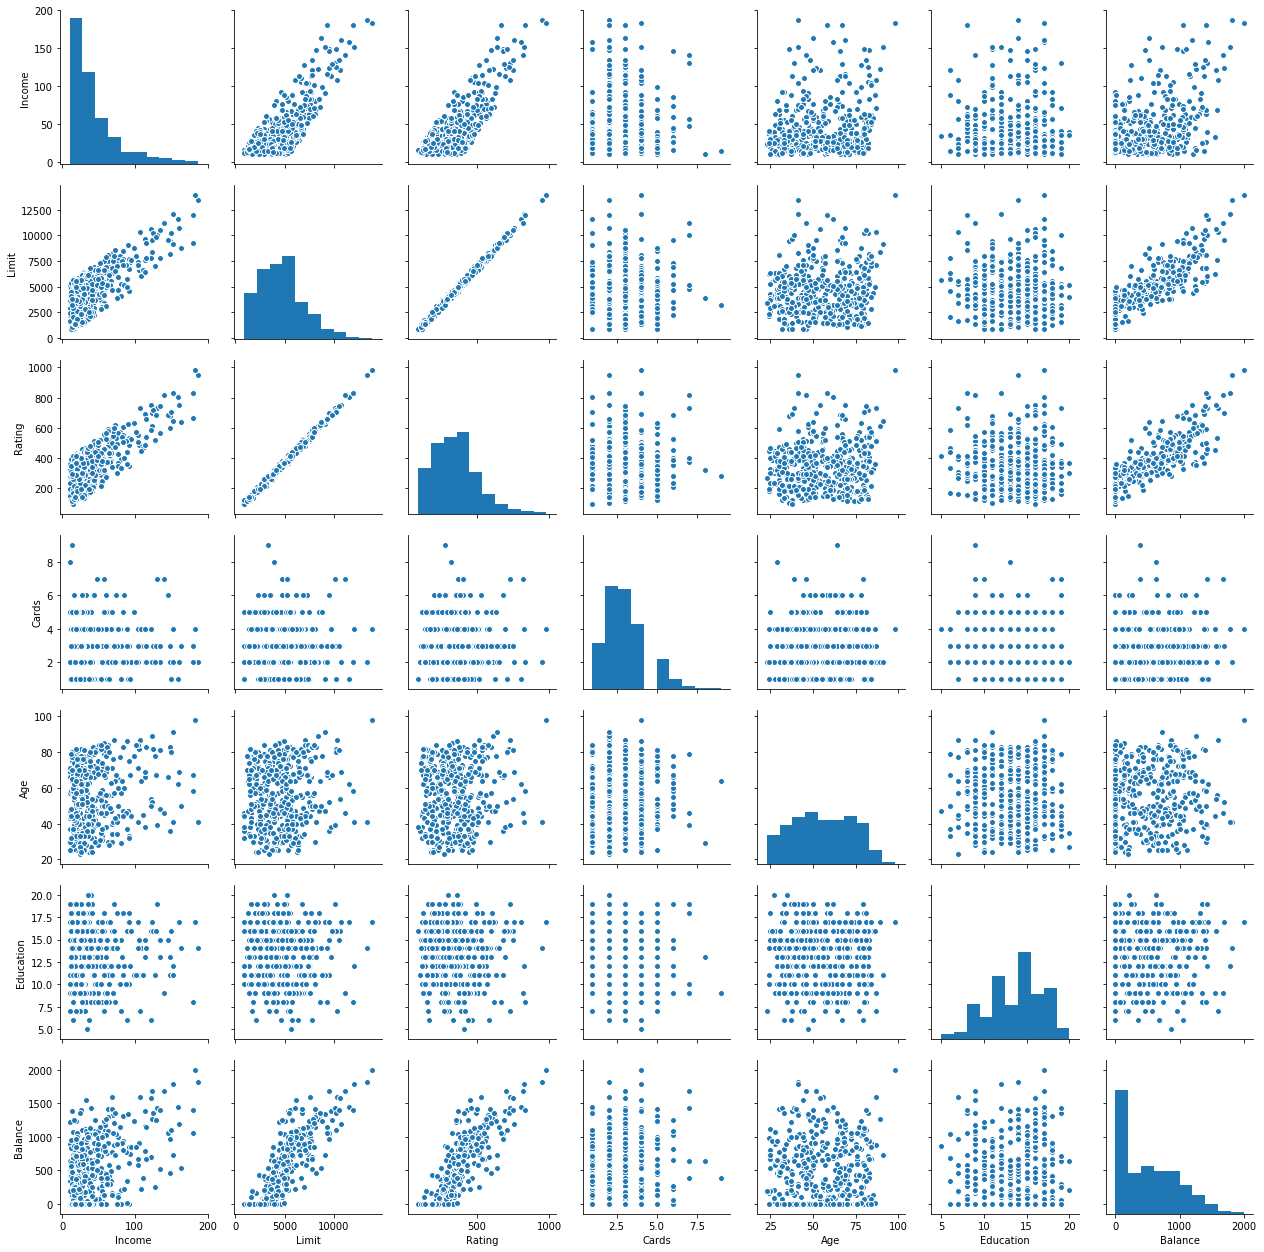

In [139]:
#¬†Gr√°ficamos 
sns.pairplot(datosCredito)

### Predictores cualitativos con soÃÅlo dos niveles

Suponga que deseamos investigar las diferencias en el saldo de tarjetas de creÃÅdito entre hombres y mujeres, ignorando las otras variables por el momento. Si un predictor cualitativo (tambieÃÅn conocido como un _factor_) soÃÅlo tiene dos niveles, o categoriÃÅas, o valores posibles, entonces su incorporacioÃÅn en un modelo de regresioÃÅn es muy simple. Para esto se crea un indicador o variable _dummy_ que toma dos valores numeÃÅricos posibles. Por ejemplo, basaÃÅndonos en la variable de geÃÅnero, podemos crear una nueva variable que tome la forma:

$$ x_i = \Bigg \{
\begin{align*} 
\text{1 si la i-esima persona es mujer} \\ 
\text{0 si la i-esima persona es hombre}
\end{align*}
$$

y esta variable se usa como una predictora en la ecuacioÃÅn de regresioÃÅn. El modelo resultante es

$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i =  \Bigg \{
\begin{align*} 
\beta_0 + \beta_1 + \epsilon_i \space\space \text{si la persona es mujer} \\ 
\beta_0 + \epsilon_i \space \text{si la persona es hombre}
\end{align*}
$$

Ahora $\beta_0$ se interpreta como el saldo promedio de la tarjeta de creÃÅdito para los hombres, $\beta_0 + \beta_1$ como el saldo promedio de la tarjeta de creÃÅdito para las mujeres, y $\beta_1$ como la diferencia promedia en el saldo de la tarjeta de creÃÅdito entre las mujeres y los hombres.

La siguiente tabla muestra las estimaciones de coeficientes y otra informacioÃÅn asociada con el modelo anterior. Se estima que la deuda promedio de tarjetas de creÃÅdito para los hombres es de 509.80, mientras que para las mujeres se calcula que tienen 19.73 de deuda adicional para un total de 509.80 + 19.73 = 529.53. Sin embargo, observamos que el **p-valor para la variable dummy es muy alto**. _Esto indica que no hay evidencia estadiÃÅstica de una diferencia en el saldo promedio de tarjetas de creÃÅdito entre los geÃÅneros_.


In [257]:
est = smf.ols('Balance ~ Gender', datosCredito).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

La decisioÃÅn de codificar a las mujeres como 1 y los hombres como 0 en la ecuaci√≥n anterior es arbitraria, y no tiene ninguÃÅn efecto en el ajuste de regresioÃÅn, pero siÃÅ altera la interpretacioÃÅn de los coeficientes. Si hubieÃÅramos codificado a los hombres como 1 y las mujeres como 0, entonces las estimaciones para $\beta_0$ y $\beta_1$ habriÃÅan sido 529.53 y -19.73, respectivamente, lo que conduce una vez maÃÅs a una prediccioÃÅn de la deuda de tarjetas de creÃÅdito de 529.53 - 19.73 = 509.80 para los hombres y una prediccioÃÅn de 529.53 para las mujeres. Alternativamente, en lugar de un esquema de codificacioÃÅn 0/1, podriÃÅamos crear una variable dummy

$$ x_i = \Bigg \{
\begin{align*} 
\text{1 si la i-esima persona es mujer} \\ 
\text{-1 si la i-esima persona es hombre}
\end{align*}
$$

y usar esta variable en la ecuacioÃÅn de regresioÃÅn. El modelo resultante es

$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i =  \Bigg \{
\begin{align*} 
\beta_0 + \beta_1 + \epsilon_i \space\space \text{si la persona es mujer} \\ 
\beta_0 - \beta_1 + \epsilon_i \space \text{si la persona es hombre}
\end{align*}
$$

En este caso, $\beta_0$ puede ser interpretado como el saldo promedio de la tarjeta de creÃÅdito promedio (ignorando el efecto de geÃÅnero), y $\beta_1$ es la cantidad que las mujeres estaÃÅn por encima del promedio y que los hombres estaÃÅn por debajo del promedio. En este ejemplo, la estimacioÃÅn para $\beta_0$ es 519.665, a medio camino entre los promedios de hombres y mujeres de 509.80 y 529.53. La estimacioÃÅn para $\beta_1$ es 9.865, que es la mitad de 19.73, la diferencia media entre las mujeres y los hombres. Es importante senÃÉalar que las predicciones finales de los saldos de creÃÅdito de los hombres y las mujeres seraÃÅn ideÃÅnticas, _independientemente del esquema de codificacioÃÅn utilizado_. La uÃÅnica diferencia estaÃÅ en la forma en que se interpretan los coeficientes.

###¬†Creando variables dummy manualmente

De igual forma podr√≠amos haber creado una variable dummy para nuestros datos de publicidad. En este caso los datos de publicidad no tienen ningun predictor categ√≥rico, por lo que podemos crear uno de la siguiente forma a manera de ejemplo:


In [261]:
# Colocamos una semilla para poder reproducir el mismo ejercicio mas tarde
np.random.seed(12345)
# Creamos una seria de valores boleanos en los cuales la mitad ser√°n True o de valor positivo
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# Creamos un atributo tama√±o o "Size" y le asignamos el valor "small", para luego cambiar la mitad a "large"
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

TV  radio  newspaper  sales   Size
1  230.1   37.8       69.2   22.1  large
2   44.5   39.3       45.1   10.4  small
3   17.2   45.9       69.3    9.3  small
4  151.5   41.3       58.5   18.5  small
5  180.8   10.8       58.4   12.9  large

En scikit-learn, nosotros necesitamos representar todos los valores n√∫mericamente. Dado que nuestra variable dummy solo tiene dos categorias, podemos representar esta con valores binarios, asi:

In [262]:
# Creamos una nueva Serie llamada IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

TV  radio  newspaper  sales   Size  IsLarge
1  230.1   37.8       69.2   22.1  large        1
2   44.5   39.3       45.1   10.4  small        0
3   17.2   45.9       69.3    9.3  small        0
4  151.5   41.3       58.5   18.5  small        0
5  180.8   10.8       58.4   12.9  large        1

Creamos de nuevo la regresion lineal multiple incluyendo el predictor **IsLarge**:

In [267]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
lm.coef_

array([ 0.04571982,  0.18872814, -0.00109768,  0.05742385])

**Como interpretamos el coeficiente de IsLarge?**

Para una cantidad dada de gastos en p√∫blicidad para TV, Radio y Prensa; siendo un mercado grande esta asociado con un incremento promedio de ventas de 57.42 productos (comparado con un mercado peque√±o, el cual es llamado nivel de l√≠nea base).

**Que pasa si invertimos los valores (0/1) y creamos un predictor 'IsSmall' en su lugar?**

El coeficiente deber√≠a ser el mismo, excepto que ser√≠a de valor negativo en lugar de positivo. Asi que de nuevo, la escogencia de la categoria para la l√≠nea base no importa, todo eso cambia es la interpretaci√≥n de los coeficientes.


### Predictores cualitativos con maÃÅs de dos niveles

Cuando un predictor cualitativo tiene maÃÅs de dos niveles, una sola variable dummy no puede representar todos los valores posibles. En esta situacioÃÅn, podemos crear variables dummy adicionales. Por ejemplo, para la variable eÃÅtnica se crean dos variables ficticias. La primera podriÃÅa ser

$$ x_{i1} = \Bigg \{
\begin{align*} 
\text{1 si la i-esima persona es Asi√°tica} \\ 
\text{0 si la i-esima persona no es Asi√°tica}
\end{align*}
$$

y la segunda seriÃÅa

$$ x_{i2} = \Bigg \{
\begin{align*} 
\text{1 si la i-esima persona es Cauc√°sica} \\ 
\text{0 si la i-esima persona no es Cauc√°sica}
\end{align*}
$$

Estas dos variables pueden ser usadas en la ecuacioÃÅn de regresioÃÅn para obtener el modelo

$$ y_i = \beta_0 + \beta_1x_{i1}  + \beta_2x_{i2} + \epsilon_i =  \Bigg \{
\begin{align*} 
\beta_0 + \beta_1 + \epsilon_i \space\space \text{si la persona es AsiaÃÅtica} \\ 
\beta_0 + \beta_2 + \epsilon_i \space \text{si la persona es CaucaÃÅsica} \\
\beta_0 + \epsilon_i \space \text{si la persona es Afroamericana}
\end{align*}
$$


Ahora $\beta_0$ puede ser interpretado como el saldo promedio de tarjetas de creÃÅdito para los Afroamericanos, $\beta_1$ puede interpretarse como la diferencia en el saldo promedio entre las categoriÃÅas AsiaÃÅtica y Afroamericana, y $\beta_2$ puede interpretarse como la diferencia en el saldo promedio entre las categoriÃÅas CaucaÃÅsica y Afroamericana.

**Siempre habraÃÅ una variable dummy menos que el nuÃÅmero de niveles que tenga la variable cualitativa**. El nivel sin variable dummy, Afroamericano en este ejemplo, se conoce como la _liÃÅnea de base_. De la siguiente tabla, vemos que el saldo estimado para la liÃÅnea base, Afroamericano, es 531.


In [452]:
#est = smf.ols('Balance ~ C(Ethnicity)', datosCredito).fit() # C significa en Statsmodel que utilice variables categ√≥ricas
est = smf.ols('Balance ~ Ethnicity', datosCredito).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Se estima que la categoriÃÅa AsiaÃÅtica tendraÃÅ 18.69 doÃÅlares menos de deuda que la categoriÃÅa Afroamericana y que la categoriÃÅa CaucaÃÅsica tendraÃÅ menos 12.50 doÃÅlares de deuda que la categoriÃÅa Afroamericana. Sin embargo, los p-valores asociados con las estimaciones de los coeficientes para las dos variables ficticias son muy grandes, lo que sugiere que no hay evidencia estadiÃÅstica de una diferencia real en el saldo de tarjetas de creÃÅdito entre las etnias.

Una vez maÃÅs, el nivel seleccionado como categoriÃÅa de liÃÅnea de base es arbitrario y las predicciones finales para cada grupo seraÃÅn las mismas independientemente de esta eleccioÃÅn. Sin embargo, los coeficientes y sus p-valores dependen de la eleccioÃÅn de la codificacioÃÅn de la variable ficticia. En lugar de confiar en los coeficientes individuales, podemos usar una prueba F para probar $H_0$: $\beta_1=\beta_2=0$, la cual no depende de la codificacioÃÅn. Esta prueba F tiene un p-valor de 0,96, lo que indica que no podemos rechazar la hipoÃÅtesis nula de que no hay relacioÃÅn entre saldo y etnicidad.

El uso de este enfoque variable dummy no presenta dificultades cuando se incorporan tanto los predictores cuantitativos como cualitativos. Por ejemplo, para regresar el saldo sobre una variable cuantitativa como el ingreso y una variable cualitativa como estudiante, debemos simplemente crear una variable ficticia para estudiante y luego ajustar un modelo de regresioÃÅn muÃÅltiple usando el ingreso y la variable ficticia como predictores del saldo de la tarjeta de creÃÅdito.

Hay muchas maneras diferentes de codificar las variables cualitativas ademaÃÅs del enfoque de variable ficticia que se toma aquiÃÅ. Todos estos enfoques conducen a ajustes de modelos equivalentes, pero los coeficientes son diferentes, tienen diferentes interpretaciones, y estaÃÅn disenÃÉados para medir contrastes particulares.


### Utilizando los datos de p√∫blicidad

De neuvo si utilizaramos los datos de P√∫blicidad, podemos crear un nuevo predictor con mas de 3 categorias de la siguiente manera:

Creemos un nuevo atributo o variable llamada "**Area**" y aleatoriamente asignemos observaciones que contengan los valores de **rural, suburban, y urban**

In [268]:
np.random.seed(123456)
# Asignar un tercio de las observaciones a cada grupo
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

TV  radio  newspaper  sales   Size  IsLarge      Area
1  230.1   37.8       69.2   22.1  large        1     rural
2   44.5   39.3       45.1   10.4  small        0     urban
3   17.2   45.9       69.3    9.3  small        0     rural
4  151.5   41.3       58.5   18.5  small        0     urban
5  180.8   10.8       58.4   12.9  large        1  suburban

Tenemos que de nuevo, representar los valores del predictor Area de forma n√∫merica; pero esta vez no podemos simplemente codificarlos como 0=rural, 1=suburban, 2=urban por que de esta forma implicar√≠a una relaci√≥n ordenada entre suburban y urban (y asi urban es como "dos veces" la categor√≠a suburban).

En lugar, creamos otra variable dummy asi:

In [269]:
# Creamos 3 variables dummy utilizando la funci√≥n get_dummies de la libreria pandas, 
#¬†y luego excluimos la primer columna
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# Concatenamos o unimos las columnas de la variable dummy con los datos originales
# del DataFrame (axis=0 significa filas, axis=1 significa columnas)
data = pd.concat([data, area_dummies], axis=1)
data.head()

TV  radio  newspaper  sales   Size  IsLarge      Area  Area_suburban  \
1  230.1   37.8       69.2   22.1  large        1     rural              0   
2   44.5   39.3       45.1   10.4  small        0     urban              0   
3   17.2   45.9       69.3    9.3  small        0     rural              0   
4  151.5   41.3       58.5   18.5  small        0     urban              0   
5  180.8   10.8       58.4   12.9  large        1  suburban              1   

   Area_urban  
1           0  
2           1  
3           0  
4           1  
5           0

Donde:

- **rural** es codificado como Area_suburban=0 y Area_urban=0<br>
- **suburban** es codificado como Area_suburban=1 y Area_urban=0<br>
- **urban** es codificado como Area_suburban=0 y Area_urban=1


De nuevo, **¬øpor que solamente necesitamos 2 variables dummy y no 3?** Por que dos variables dummy capturan toda la informaci√≥n acerca del predictor **Area**, e implicitamente define rural como el nivel de _l√≠nea base_. (En general, si se tiene un predictor categ√≥rico con k niveles, entonces se crean k-1 variables dummy como se explico anteriormente)

Si esto es confuso, piense de nuevo en el predictor 'Size' (IsLarge) que solo necesitamos una variable dummy, no dos (IsSmall e IsLarge).

Ahora incluyamos estas nuevas variables dummy en el modelo:

In [271]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales
lm = LinearRegression()
lm.fit(X, y)
# print coefficients
lm.coef_

array([ 0.04574401,  0.1878667 , -0.0010877 ,  0.07739661, -0.10656299,
        0.26813802])

**¬øComo interpreramos los coeficientes?**

- Dejando todas las otras variables constantes, un √°rea **suburbana** esta asociada con el promedio en la **reducci√≥n** de ventas de 106.56 productos (comparado con la l√≠nea base, el cual es rural).

- Un √°rea **urbana** esta asociada con el promedio en el **incremento** en ventas de 268.13 productos (comparado con lo rural)

Una nota final acerca de codificar variables dummy: Si se tienen categor√≠as que pueden ser clasificadas en cierto orden (ej. fuertemente en desacuerdo, en desacuerdo, neutral, de acuerdo, fuertemente de acuerdo), potencialmente se puede usar una variable dummy y representarla con categorias n√∫mericas (semejante 1, 2, 3, 4, 5).


### Extensiones del modelo lineal

El modelo de regresioÃÅn lineal estaÃÅndar proporciona resultados interpretables y funciona bastante bien en muchos problemas del mundo real. Sin embargo, hace varios supuestos altamente restrictivos que a menudo son violados en la praÃÅctica. Dos de los supuestos maÃÅs importantes afirman que la relacioÃÅn entre los predictores y la respuesta es _**aditiva y lineal**_.

La suposicioÃÅn aditiva significa que el efecto de los cambios en un predictor $X_j$ sobre la respuesta $Y$ es independiente de los valores de los otros predictores. La hipoÃÅtesis lineal establece que el cambio en la respuesta $Y$ debido a un cambio de una unidad en $X_j$ es constante, independientemente del valor de $X_j$. A continuacioÃÅn se presentan algunos meÃÅtodos que relajan estos dos supuestos. Se estudiaraÃÅn brevemente algunos enfoques claÃÅsicos comunes para extender el modelo lineal.


#### EliminacioÃÅn del supuesto de aditividad

En el anaÃÅlisis anterior de los datos de P√∫blicidad, llegamos a la conclusioÃÅn de que tanto la televisioÃÅn como la radio parecen estar asociadas con las ventas. Los modelos l√≠neales que formaron la base para esta conclusioÃÅn supusieron que el efecto sobre las ventas de aumentar un medio publicitario es independiente de la cantidad gastada en los otros medios. Por ejemplo, uno de los modelos lineales anteriores establece que el efecto promedio sobre las ventas de un aumento de una unidad en TV es siempre $\beta_1$, independientemente de la cantidad gastada en radio.

Sin embargo, este modelo tan simple puede ser incorrecto. Supongamos que gastar dinero en propaganda radial realmente aumenta la efectividad de la publicidad televisiva, de modo que el coeficiente de la pendiente para TV deberiÃÅa aumentar a medida que aumenta el gasto en radio. En esta situacioÃÅn, dado un presupuesto fijo de 100,000 doÃÅlares, gastar la mitad en la radio y la mitad en la televisioÃÅn puede aumentar las ventas maÃÅs que asignar la cantidad total a la televisioÃÅn o a la radio. En marketing, esto se conoce como un efecto de _sinergia_, y en estadiÃÅstica se conoce como un efecto de _interaccioÃÅn_. La figura tridimensional mostrada anteriormente sugiere que tal efecto puede estar presente en los datos de publicidad.

Observe que cuando uno de los niveles de TV o radio es bajo, las ventas verdaderas son inferiores a las previstas por el modelo lineal. Pero cuando la publicidad se divide entre los dos medios, entonces el modelo tiende a subestimar las ventas. Considere el modelo de regresioÃÅn lineal estaÃÅndar con dos variables,

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon $$

SeguÃÅn este modelo, si aumentamos $X_1$ en una unidad, entonces Y aumentaraÃÅ en un promedio de $\beta_1$ unidades. Observe que la presencia de $X_2$ no altera esta afirmacioÃÅn, es decir, independientemente del valor de $X_2$, un incremento de una unidad en $X_1$ daraÃÅ lugar a un incremento de unidad $\beta_1$ en $Y$. Una forma de ampliar este modelo para permitir efectos de interaccioÃÅn es incluir un tercer predictor, llamado teÃÅrmino de interaccioÃÅn, que se construye calculando el producto de $X_1$ y $X_2$. Esto produce el modelo

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon $$

¬øCoÃÅmo la inclusioÃÅn de este teÃÅrmino de la interaccioÃÅn relaja el supuesto de aditividad? Observe que la Ec. anterior se puede reescribir como:

$$ Y = \beta_0 + (\beta_1 + \beta_3X_2)X_1 + \beta_2X_2 + \epsilon $$

$$ = \beta_0 + \tilde \beta_1X_1 + \beta_2X_2 + \epsilon $$

Donde $\tilde \beta_1 = \beta_1 + \beta_3X_2$. Dado que $\tilde \beta_1$ cambia con $X_2$, el efecto de $X_1$ en $Y$ ya no es constante: el valor de $X_2$ cambiaraÃÅ el impacto de $X_1$ en $Y$.

Por ejemplo, suponga que se quiere estudiar la productividad de una faÃÅbrica. Se desea predecir el nuÃÅmero de unidades producidas sobre la base del nuÃÅmero de liÃÅneas de produccioÃÅn y el nuÃÅmero total de trabajadores. Parece probable que el efecto de aumentar el nuÃÅmero de liÃÅneas de produccioÃÅn dependeraÃÅ del nuÃÅmero de trabajadores, ya que si no hay trabajadores disponibles para operar las liÃÅneas, el aumento del nuÃÅmero de liÃÅneas no aumentaraÃÅ la produccioÃÅn. Esto sugiere que seriÃÅa apropiado incluir un teÃÅrmino de interaccioÃÅn entre liÃÅneas y trabajadores en un modelo lineal para predecir las unidades.

Suponga que cuando se ajusta el modelo, obtenemos

$$ units = 1.2 + 3.4 \times lines + 0.22 \times workers + 1.4 \times (lines \times workers ) $$

$$ = 1.2 + (3.4 + 1.4 \times workers) \times lines + 0.22 \times workers $$

En otras palabras, anÃÉadir una liÃÅnea adicional aumentaraÃÅ el nuÃÅmero de unidades producidas por 3.4 + 1.4 √ó trabajadores. Por lo tanto, cuanto maÃÅs trabajadores tengamos, maÃÅs fuerte seraÃÅ el efecto de las liÃÅneas de produccioÃÅn.


Regresando al ejemplo de Publicidad, un modelo lineal que utiliza radio, TV, y una interaccioÃÅn entre los dos para predecir las ventas toma la forma

$$ sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times (radio \times TV) + \epsilon $$

$$ = \beta_0 + (\beta_1 + \beta_3 \times radio) \times TV + \beta_2 \times radio + \epsilon $$

Podemos interpretar $\beta_3$ como el aumento de la efectividad de la publicidad televisiva para un incremento de una unidad en la publicidad radial (o viceversa). Los coeficientes que resultan del ajuste del respectivo modelo se presentan en la siguiente tabla:



In [272]:
#¬†Interacci√≥n de variables
est = smf.ols('sales ~ TV + radio + TV*radio', data).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Los resultados de la anterior tabla sugieren fuertemente que el modelo que incluye el teÃÅrmino de interaccioÃÅn es superior al modelo que contiene soÃÅlo los efectos principales. El p-valor para el teÃÅrmino de interaccioÃÅn, TV x radio, es extremadamente bajo, indicando que hay una fuerte evidencia de que $H_a$: $\beta_3$ es diferente de 0. En otras palabras, estaÃÅ claro que la verdadera relacioÃÅn no es aditiva. El $R^2$ para este modelo es 96.8%, comparado con solamente 89.7% para el modelo que predice ventas usando la TV y la radio sin un teÃÅrmino de la interaccioÃÅn. Esto significa que (96,8-89,7)/(100-89,7) = 69% de la variabilidad en las ventas que permanece despueÃÅs de ajustar el modelo aditivo se ha explicado por el teÃÅrmino de interaccioÃÅn.

Las estimaciones de los coeficientes en la tabla anterior sugieren que un aumento en la publicidad de televisioÃÅn de 1,000 estaÃÅ asociado con el aumento de ventas de $(\hat \beta_1 +  \hat \beta_3 \times radio) \times 1,000 = 19 + 1.1 \times radio$ unidades.

Y un aumento de la publicidad en la radio de 1,000 se asociaraÃÅ con un aumento en las ventas de 

$(\hat \beta_2 +  \hat \beta_3 \times TV) \times 1,000 = 28.9 + 1.1 \times TV$ unidades.

En este ejemplo, los p-valores asociados con TV, radio y el teÃÅrmino de interaccioÃÅn son todos estadiÃÅsticamente significativos, por lo que es obvio que las tres variables deben ser incluidas en el modelo. Sin embargo, a veces ocurre que un teÃÅrmino de interaccioÃÅn tiene un p-valor pequenÃÉo, pero los efectos principales asociados (en este caso, televisioÃÅn y radio) no.

El _principio jeraÃÅrquico_ establece que _si se incluye una interaccioÃÅn en un modelo, tambieÃÅn debemos incluir los efectos principales, incluso si los p-valores asociados con sus coeficientes no son significativos_. En otras palabras, si la interaccioÃÅn entre $X_1$ y $X_2$ parece importante, entonces deberiÃÅamos incluir tanto $X_1$ como $X_2$ en el modelo, incluso si las estimaciones de sus coeficientes tienen grandes p-valores. La razoÃÅn de este principio es que si $X_1 \times X_2$ estaÃÅ relacionado con la respuesta, entonces si los coeficientes de $X_1$ o $X_2$ son exactamente cero es de poco intereÃÅs. TambieÃÅn $X_1 \times X_2$ se correlaciona tiÃÅpicamente con $X_1$ y $X_2$, y asiÃÅ dejarlas fuera tiende a alterar el significado de la interaccioÃÅn.

### Interacci√≥n entre variables cualitativas y cuantitativas

En el ejemplo anterior, se consideroÃÅ una interaccioÃÅn entre la TV y la radio, ambas variables cuantitativas. Sin embargo, el concepto de interaccioÃÅn se aplica tanto a variables cualitativas como a una combinacioÃÅn de variables cuantitativas y cualitativas. De hecho, una interaccioÃÅn entre una variable cualitativa y una variable cuantitativa tiene una interpretacioÃÅn particularmente importante. 

Consideremos el conjunto de datos de **CreÃÅdito** y supongamos que deseamos predecir el saldo usando las variables de ingreso (cuantitativo) y de estudiante (cualitativo). En ausencia de un teÃÅrmino de interaccioÃÅn, el modelo toma la forma

$$ balance_i = \beta_0 + \beta_1 \times income_i + \Bigg \{
\begin{align*} 
\beta_2 \space\space \text{si la persona es estudiante} \\ 
0 \space \text{si la persona no es estudiante}
\end{align*}
$$

$$ = \beta_1 \times income_i + \Bigg \{
\begin{align*} 
\beta_0 + \beta_2 \space\space \text{si la persona es estudiante} \\ 
\beta_0 \space \text{si la persona no es estudiante}
\end{align*}
$$

Observe que esto equivale a ajustar a los datos dos rectas paralelas, una para los estudiantes y otra para los no estudiantes. Las rectas para estudiantes y no estudiantes tienen interceptos diferentes, $\beta_0 + \beta_2$ versus $\beta_0$, pero la misma pendiente, $\beta_1$. Esto se ilustra en el panel izquierdo de la siguiente figura. El hecho de que las rectas sean paralelas significa que el efecto promedio sobre el saldo de un aumento en una unidad de ingresos no depende de si el individuo es o no un estudiante.

Esto representa una limitacioÃÅn potencialmente seria del modelo, ya que de hecho un cambio en los ingresos puede tener un efecto muy diferente en el saldo de la tarjeta de creÃÅdito de un estudiante versus un no estudiante. Esta limitacioÃÅn puede ser abordada mediante la adicioÃÅn de una variable de interaccioÃÅn, creada multiplicando el ingreso por la variable dummy para estudiante. Nuestro modelo ahora se convierte en

$$ balance_i = \beta_0 + \beta_1 \times income_i + \Bigg \{
\begin{align*} 
\beta_2 + \beta_3 \times income_i \space\space \text{si la persona es estudiante} \\ 
0 \space \text{si la persona no es estudiante}
\end{align*}
$$

$$ = \Bigg \{
\begin{align*} 
(\beta_0 + \beta_2) + (\beta_1 + \beta_3) \times income_i \space\space \text{si la persona es estudiante} \\ 
\beta_0 + \beta_1 \times income_i \space \text{si la persona no es estudiante}
\end{align*}
$$

Una vez maÃÅs, tenemos dos rectas de regresioÃÅn diferentes para los estudiantes y los no-estudiantes. Pero ahora esas rectas de regresioÃÅn tienen diferentes interceptos, $\beta_0 + \beta_2$ frente a $\beta_0$, asiÃÅ como diferentes pendientes, $\beta_1 + \beta_3$ frente a $\beta_1$. Esto permite la posibilidad de que los cambios en los ingresos puedan afectar los saldos de tarjetas de creÃÅdito de estudiantes y no estudiantes de manera diferente. El panel derecho de la siguiente figura muestra las relaciones estimadas entre ingreso y saldo para estudiantes y no estudiantes en el anterior modelo. Observamos que la pendiente para los estudiantes es menor que la pendiente para los no-estudiantes. Esto sugiere que los aumentos en los ingresos estaÃÅn asociados con aumentos maÃÅs pequenÃÉos en el saldo de la tarjeta de creÃÅdito entre los estudiantes en comparacioÃÅn con los no estudiantes.

In [450]:
est1 = smf.ols('Balance ~ Income + C(Student)', datosCredito).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*C(Student)', datosCredito).fit()
regr2 = est2.params

print('Regresi√≥n 1 - sin terminos interacutando')
print(regr1)
print('\nRegresion 2 - con interacci√≥n de terminos')
print(regr2)

Regresi√≥n 1 - sin terminos interacutando
Intercept            211.142964
C(Student)[T.Yes]    382.670539
Income                 5.984336
dtype: float64

Regresion 2 - con interacci√≥n de terminos
Intercept                   200.623153
C(Student)[T.Yes]           476.675843
Income                        6.218169
Income:C(Student)[T.Yes]     -1.999151
dtype: float64


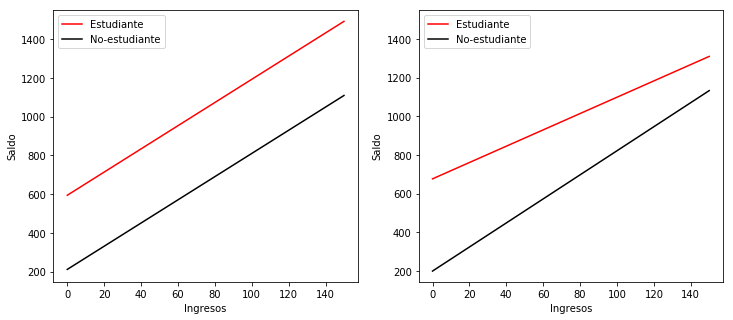

In [283]:
# Ingresos (x-axis)
income = np.linspace(0,150)
# Saldo sin terminos de interacci√≥n (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student[T.Yes]'],
                       regr1['Intercept']+regr1['Student[T.Yes]']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Saldo con terminos de interacci√≥n (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student[T.Yes]'],
                       regr2['Intercept']+regr2['Student[T.Yes]']+
                       150*(regr2['Income']+regr2['Income:Student[T.Yes]']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Creamos la gr√°fica
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['Estudiante', 'No-estudiante'], loc=2)
    ax.set_xlabel('Ingresos')
    ax.set_ylabel('Saldo')
    ax.set_ylim(ymax=1550)

### Relaciones no lineales

Como se discutioÃÅ anteriormente, el modelo de regresioÃÅn lineal asume una relacioÃÅn lineal entre la respuesta y los predictores. Pero en algunos casos, la verdadera relacioÃÅn entre la respuesta y los predictores puede ser no lineal. En lo que sigue se presenta una manera muy simple de extender el modelo lineal para acomodar las relaciones no lineales, utilizando la _regresioÃÅn polinomial_.

Considere la siguiente figura, en la que se muestra el **mpg** (consumo de gas en millas por galoÃÅn) y la **potencia** de un grupo de automoÃÅviles en el conjunto de datos denominado **Auto**. La liÃÅnea naranja representa el ajuste de la regresioÃÅn lineal. Hay una relacioÃÅn clara entre mpg y caballos de fuerza, pero parece claro que esta relacioÃÅn es de hecho no lineal: los datos sugieren una relacioÃÅn curvada. Un enfoque simple para incorporar asociaciones no lineales en un modelo lineal es incluir _transformaciones de los predictores_ en el modelo. Por ejemplo, los puntos en la figura parecen tener una forma cuadraÃÅtica, lo que sugiere que un modelo de la forma

$$ mpg = \beta_0 + \beta_1 \times horsepower + \beta_2 \times horsepower^2 +\epsilon $$

puede proporcionar un mejor ajuste. La ecuacioÃÅn implica la prediccioÃÅn de mpg usando una funcioÃÅn no lineal de los caballos de fuerza. ¬°Pero sigue siendo un modelo lineal! Es decir, la ecuaci√≥n es simplemente un modelo de regresioÃÅn lineal muÃÅltiple con $X_1$=caballos de fuerza y $X_2$=caballos de fuerza$^2$. 

In [453]:
# Cargamos los datos de Autos 
#auto = pd.read_csv('Auto.csv', na_values=['?'])
datosAutos = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv', na_values=['?'])
datosAutos.dropna(inplace=True)
datosAutos.reset_index(drop=True, inplace=True)
datosAutos.head() # Lista los primeros datos de la tabla o dataframe

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [455]:
#¬†Debido a que los datos de caballos de fuerza de la base de datos Auto no estan completos, tienen algunos car√°cteres extra√±os
#¬†como "?", esto impide hacer calculos y debemos de modificar estos utilizando un buen criterio como por ejemplo la media o eliminandolos del todo

def isinteger(x):
    return np.equal(np.mod(x, 1), 0)

def isNumber(x):
    if x =="?":
        return 104.45 #np.nan
    return float(x)

# Reemplazamos los valores "?" por nulos y el resto los convertimos de texto a flotante
#datosAutos.horsepower = [isNumber(x) for x in datosAutos.horsepower]
#datosAutos.horsepower.describe()

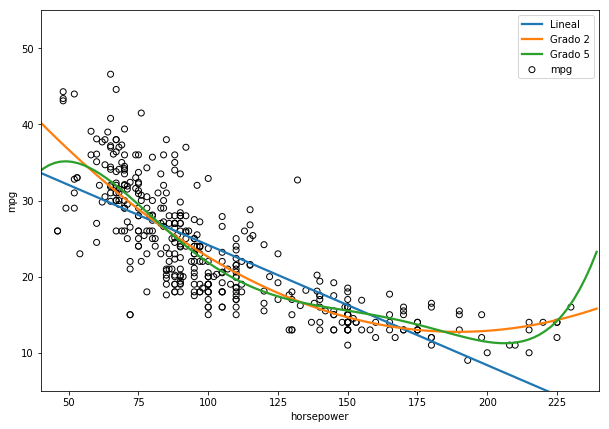

In [456]:
# Utilizando la funci√≥n regplot()  de Seaborn, facilmente podemos gr√°ficar polinomios de alto grado.
import seaborn as sns
plt.figure(figsize=(10, 7), dpi=72)
plt.scatter(datosAutos['horsepower'], datosAutos['mpg'], facecolors='None', edgecolors='k') 
sns.regplot(datosAutos.horsepower, datosAutos.mpg, ci=None, label='Lineal', scatter=False)
sns.regplot(datosAutos.horsepower, datosAutos.mpg, ci=None, label='Grado 2', order=2, scatter=False)
sns.regplot(datosAutos.horsepower, datosAutos.mpg, ci=None, label='Grado 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

Por lo tanto, podemos utilizar cualquier software de regresioÃÅn lineal estaÃÅndar para estimar $\beta_0$, $\beta_1$ y $\beta_2$ con el fin de producir un ajuste no lineal. La curva azul en la figura muestra el ajuste cuadraÃÅtico a los datos resultante. El _ajuste cuadraÃÅtico_ parece ser sustancialmente mejor que el ajuste obtenido cuando soÃÅlo se incluye el teÃÅrmino lineal. El $R^2$ del ajuste cuadraÃÅtico es 0.688, en comparacioÃÅn con 0.606 para el ajuste lineal, y el p-valor en la siguiente tabla para el teÃÅrmino cuadraÃÅtico es muy significativo.

In [457]:
est1 = smf.ols('mpg ~ horsepower', datosAutos).fit()
regr1 = est1.params

datosAutos['horsepower2'] = datosAutos.horsepower**2
datosAutos.head(3)

est2 = smf.ols('mpg ~ horsepower + horsepower2', datosAutos).fit()
regr2 = est2.params

print('Regresi√≥n 1 - sin terminos interacutando')
print(regr1)
print('\nRegresion 2 - con interacci√≥n de terminos')
print(regr2)

Regresi√≥n 1 - sin terminos interacutando
Intercept     39.935861
horsepower    -0.157845
dtype: float64

Regresion 2 - con interacci√≥n de terminos
Intercept      56.900100
horsepower     -0.466190
horsepower2     0.001231
dtype: float64


In [433]:
est2.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Si la inclusioÃÅn de $horsepower^2$ produjo a una gran mejora en el modelo, ¬øpor queÃÅ no incluir $horsepower^3$, $horsepower^4$, o incluso caballos de fuerza5 o $horsepower^5$? La curva verde de la figura anterior muestra el ajuste que resulta de incluir todos los polinomios hasta el quinto grado en el modelo. El ajuste resultante parece innecesariamente ondulado, es decir, no estaÃÅ claro que la inclusioÃÅn de los teÃÅrminos adicionales realmente conduzca a un mejor ajuste a los datos.

La aproximacioÃÅn que acabamos de describir para extender el modelo lineal para acomodar relaciones no lineales se conoce como _regresioÃÅn polinomial_, ya que hemos incluido funciones polinomiales de los predictores en el modelo de regresioÃÅn.

## Problemas potenciales

Cuando ajustamos un modelo de regresioÃÅn lineal a un determinado conjunto de datos, pueden surgir muchos problemas. Los maÃÅs comunes entre estos son los siguientes:

1. No linealidad de las relaciones respuesta-predictor.
2. CorrelacioÃÅn de los teÃÅrminos de error.
3. VariacioÃÅn no constante de los teÃÅrminos de error. 
4. Valores atiÃÅpicos.
5. Puntos de alto leverage (influencia o apalancamiento).
6. Colinealidad.

En la praÃÅctica, identificar y superar estos problemas es tanto un arte como una ciencia. En la literatura se ha escrito mucho sobre este tema. Se mostraraÃÅ soÃÅlo un breve resumen de algunos puntos clave.


### 1. No linealidad de los datos

El modelo de regresioÃÅn lineal asume que existe una relacioÃÅn lineal entre los predictores y la respuesta. Si la verdadera relacioÃÅn estaÃÅ lejos de ser lineal, casi todas las conclusiones que extraemos del ajuste son sospechosas. AdemaÃÅs, la precisioÃÅn de prediccioÃÅn del modelo puede reducirse significativamente.

_**Los graÃÅficos de residuales son una herramienta graÃÅfica muy uÃÅtil para identificar la no linealidad**_. Dado un modelo de regresioÃÅn lineal simple, podemos graficar los residuos, $e_i = y_i - \hat y_i$ , contra el predictor $x_i$. En el caso de un modelo de regresioÃÅn muÃÅltiple puesto que hay muÃÅltiples predictores, en su lugar podemos graficar los residuos contra los valores predichos (o ajustados) $\hat y_i$ . Idealmente, el graÃÅfico residual no mostraraÃÅ ninguÃÅn patroÃÅn distinguible. La presencia de un patroÃÅn puede indicar un problema con alguÃÅn aspecto del modelo lineal.

El panel izquierdo de la siguiente figura muestra un graÃÅfico residual de la regresioÃÅn lineal de **mpg** sobre caballos de fuerza (**horsepower**) en el conjunto de datos **Auto** que se ilustroÃÅ en la figura anterior. La liÃÅnea roja es un ajuste suave a los residuos, que se muestra con el fin de facilitar la identificacioÃÅn de alguna tendencia. _Los residuos presentan una clara forma de U, lo que proporciona una fuerte indicacioÃÅn de no linealidad en los datos_. Por el contrario, el panel derecho de la siguiente figura muestra el graÃÅfico residual que resulta del modelo anterior que contiene un teÃÅrmino cuadraÃÅtico. El patroÃÅn anterior en los residuos praÃÅcticamente desaparece, lo que sugiere que el teÃÅrmino cuadraÃÅtico mejora el ajuste a los datos.

In [437]:
regr = skl_lm.LinearRegression()
# Linear fit
X = datosAutos.horsepower.values.reshape(-1,1)
y = datosAutos.mpg
regr.fit(X, y)
datosAutos['pred1'] = regr.predict(X)
datosAutos['resid1'] = datosAutos.mpg - datosAutos.pred1

# Quadratic fit
X2 = datosAutos[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)
datosAutos['pred2'] = regr.predict(X2)
datosAutos['resid2'] = datosAutos.mpg - datosAutos.pred2

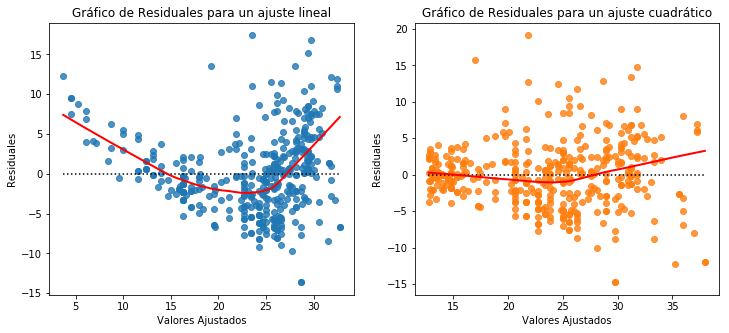

In [440]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(datosAutos.pred1, datosAutos.resid1, lowess=True, ax=ax1, line_kws={'color':'r', 'lw':2})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Gr√°fico de Residuales para un ajuste lineal')

# Right plot
sns.regplot(datosAutos.pred2, datosAutos.resid2, lowess=True, line_kws={'color':'r', 'lw':2}, ax=ax2)
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Gr√°fico de Residuales para un ajuste cuadr√°tico')

for ax in fig.axes:
    ax.set_xlabel('Valores Ajustados')
    ax.set_ylabel('Residuales')

Si la graÃÅfica residual indica que hay asociaciones no lineales en los datos, entonces una aproximacioÃÅn simple es utilizar transformaciones no lineales de los predictores, tales
como $\log{X} , \sqrt{X}$  y $X^2$ , en el modelo de regresioÃÅn.

### 2. CorrelacioÃÅn de los teÃÅrminos de error

Un supuesto importante del modelo de regresioÃÅn lineal es que los teÃÅrminos de error, ùúñ1, ùúñ2,. . . , ùúñùëõ, no estaÃÅn correlacionados. ¬øQueÃÅ significa esto? Por ejemplo, si los errores no estaÃÅn correlacionados, entonces el hecho de que ùúñùëñ sea positivo proporciona poca o ninguna informacioÃÅn sobre el signo de ùúñùëñ+1. Los errores estaÃÅndar que se calculan para los coeficientes de regresioÃÅn estimados o para los valores ajustados se basan en la suposicioÃÅn de teÃÅrminos de error no correlacionados. Si de hecho hay correlacioÃÅn entre los teÃÅrminos de error, entonces los errores estaÃÅndar estimados tenderaÃÅn a _subestimar los verdaderos errores estaÃÅndar_. Como resultado, los intervalos de confianza y prediccioÃÅn seraÃÅn maÃÅs estrechos de lo que deberiÃÅan ser.

Por ejemplo, un intervalo de confianza del 95% puede, en realidad, tener una probabilidad mucho menor que 0.95 de contener el verdadero valor del paraÃÅmetro. AdemaÃÅs, los p-valores asociados con el modelo seraÃÅn maÃÅs bajos de lo que deberiÃÅan ser; esto podriÃÅa hacernos concluir erroÃÅneamente que un paraÃÅmetro es estadiÃÅsticamente significativo. En resumen, si los teÃÅrminos de error estaÃÅn correlacionados, no podemos tener confianza en nuestro modelo.

Como un ejemplo extremo, supongamos que duplicamos accidentalmente nuestros datos, dando lugar a observaciones y teÃÅrminos de error ideÃÅnticos en parejas. Si ignoramos esto, en los caÃÅlculos del error estaÃÅndar pareceriÃÅa como si tuvieÃÅramos una muestra de tamanÃÉo 2n, cuando de hecho soÃÅlo tenemos n observaciones. Los paraÃÅmetros estimados seriÃÅan los mismos para los 2n datos como para las n observaciones, pero los intervalos de confianza
seriÃÅan maÃÅs estrechos por un factor de $\sqrt{2!}$.

**¬øPor queÃÅ pueden ocurrir correlaciones entre los teÃÅrminos de error?** Tales correlaciones ocurren con frecuencia en el contexto de **_datos de series temporales_**, que consisten en observaciones para las cuales se obtienen mediciones en puntos discretos en el tiempo. En muchos casos, las observaciones que se obtienen en puntos de tiempo adyacentes tendraÃÅn errores correlacionados positivamente. Con el fin de determinar si este es el caso en un conjunto de datos dado, podemos graficar los residuos del modelo en funcioÃÅn del tiempo. Si los errores no estaÃÅn correlacionados, entonces no deberiÃÅa haber ninguÃÅn patroÃÅn distinguible.

Por otra parte, si los teÃÅrminos de error estaÃÅn correlacionados positivamente, entonces podemos ver un _seguimiento_ en los residuos, es decir, los residuos adyacentes pueden tener valores similares. La siguiente figura proporciona una ilustracioÃÅn. En el panel superior, vemos los residuos de un ajuste de regresioÃÅn lineal a los datos generados con errores no correlacionados. No hay evidencia de una tendencia relacionada con el tiempo en los residuos. Por el contrario, los residuos en el panel inferior pertenecen a un conjunto de datos en el que los errores adyacentes teniÃÅan una correlacioÃÅn de 0.9. Ahora existe un patroÃÅn claro en los residuales, los residuos adyacentes tienden a tomar valores similares. Finalmente, el panel central ilustra un caso maÃÅs moderado en el que los residuos teniÃÅan una correlacioÃÅn de 0.5. TodaviÃÅa hay evidencia de seguimiento, pero el patroÃÅn es menos claro.

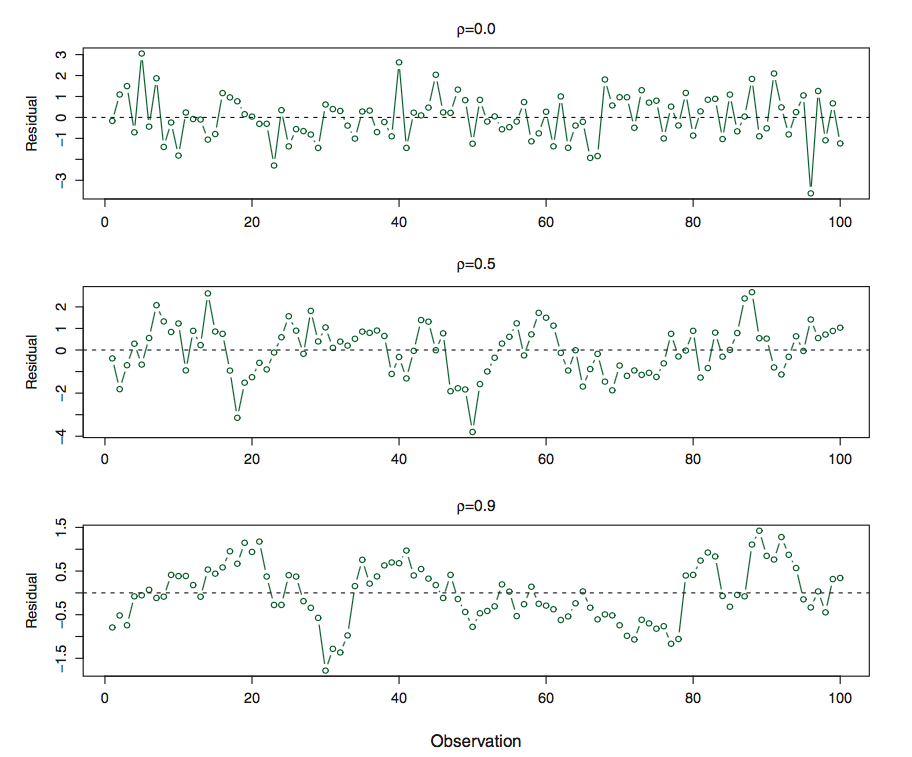

Se han desarrollado muchos meÃÅtodos para tener debidamente en cuenta las correlaciones en los teÃÅrminos de error en los datos de series de tiempo. La correlacioÃÅn entre los teÃÅrminos de error tambieÃÅn puede ocurrir en datos que no son series de tiempo. Por ejemplo, considere un estudio en el cual se quiere predecir las estaturas de los individuos por medio de sus pesos. La suposicioÃÅn de errores no correlacionados podriÃÅa ser violada si algunos de los individuos en el estudio son miembros de la misma familia, o comen la misma dieta, o han estado expuestos a los mismos factores ambientales. En general, la suposicioÃÅn de errores no correlacionados es extremadamente importante para la regresioÃÅn lineal, asiÃÅ como para otros meÃÅtodos estadiÃÅsticos, y un buen disenÃÉo experimental es crucial para mitigar el riesgo de tales correlaciones.

### 3. VariacioÃÅn no constante de los teÃÅrminos de error

Otra hipoÃÅtesis importante del modelo de regresioÃÅn lineal es que los teÃÅrminos de error tienen una varianza constante, $Var(\epsilon_i) = \sigma^2$. Los errores estaÃÅndar, los intervalos de confianza y las pruebas de hipoÃÅtesis asociadas con el modelo lineal se basan en este supuesto.

Desafortunadamente, es frecuente que las variaciones de los teÃÅrminos de error no sean constantes. Por ejemplo, las variaciones de los teÃÅrminos de error pueden aumentar con el valor de la respuesta. Se puede identificar variaciones no constantes en los errores, o _**heterocedasticidad**_, por la presencia de una _forma de embudo_ en el graÃÅfico residual. Un ejemplo se muestra en el panel izquierdo de la siguiente figura, en el que la magnitud de los residuos tiende a aumentar con los valores ajustados. Cuando se enfrenta a este problema, una posible solucioÃÅn es transformar la respuesta $Y$ usando una transformacioÃÅn coÃÅncava tal como $\log{Y}$ o $\sqrt{Y}$.

Dicha transformacioÃÅn resulta en una mayor cantidad de contraccioÃÅn de las respuestas mayores, dando lugar a una _reduccioÃÅn de la heterocedasticidad_. El panel derecho de la figura muestra el graÃÅfico residual despueÃÅs de transformar la respuesta usando $\log{Y}$. Los residuos ahora parecen tener una varianza constante, aunque hay alguna evidencia de una ligera relacioÃÅn no lineal en los datos.

![residuales vs valores ajustados](./assets/residualsvsfitvalues.png)

### Gr√°ficos similares a la salida de R

Source: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

Usualmente en R podemos graficar rapidamente los datos de tal forma que encontremos diferentes patrones en los datos y nos ayuden a tomar el camino mas adecuado. Un ejemplo del c√≥digo en R y la salida se muestra a continuaci√≥n:

``` R
model = lm(mpg ~ . - name, data=Auto)
par(mfrow=c(2,2)) # Plot 4 plots in same screen
plot(model)
```

![plot en R](./assets/Rplot.png)


In [458]:
# Cargamos las librer√≠as necesarias
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # para hacer los gr√°ficos de matplotlib mas agradables
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Ajustamos el modelo lineal completo utilizando los datos de la tabla Auto
model_f = 'mpg ~ cylinders + displacement + horsepower + \
                 weight + acceleration + year + \
                 origin'

model = smf.ols(formula=model_f, data=datosAutos)
model_fit = model.fit()

#¬†Realizamos algunos c√°lculos requeridos para algunas de las gr√°ficas a visualizar
model_fitted_y = model_fit.fittedvalues # Valores Ajustados (necesita un termino constante para el intercepto)
model_residuals = model_fit.resid # residuales del modelo
model_norm_residuals = model_fit.get_influence().resid_studentized_internal # residuales normalizados
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # residuales absolutos normalizados al cuadrado
model_abs_resid = np.abs(model_residuals) # residuales absolutos
model_leverage = model_fit.get_influence().hat_matrix_diag # leverage o influencia
model_cooks = model_fit.get_influence().cooks_distance[0] # distancia de cook


### Gr√°fico de Residuales

El primer gr√°fico generado por R es el de **Residuales**, el cual dibuja un grafico de dispersi√≥n de los valores ajustados contra los residuales, con una l√≠nea de regresi√≥n ajustada y suavizada para mostrsr cualquier tendencia aparente.

Esto resulta facil utilizando la funcion residplot de la librer√≠a seaborn, con los valores ajustados como el parametro $X$ y la variable dependiente como $Y$. _lowess=True_ s√≠gnifica que dibuje la l√≠nea de regresi√≥n ajustada. Adicionalmente los parametros _scatter_kws_ y _line_kws_ son enviados a la librer√≠a matplotlib utilizando las funciones de dispersi√≥n y lineal; al igual que los titulos y las etiquetas son dibujados utilizando los metodos de la librer√≠a matplotlib. El punto y coma al final de la instruccion es para evitar la salida del texto <matplotlib.text.Text at 0x000000000> al comienzo de la gr√°fica. Los 3 valores mas altos de residuales absolutos tambien son anotados o resaltados en el gr√°fico.

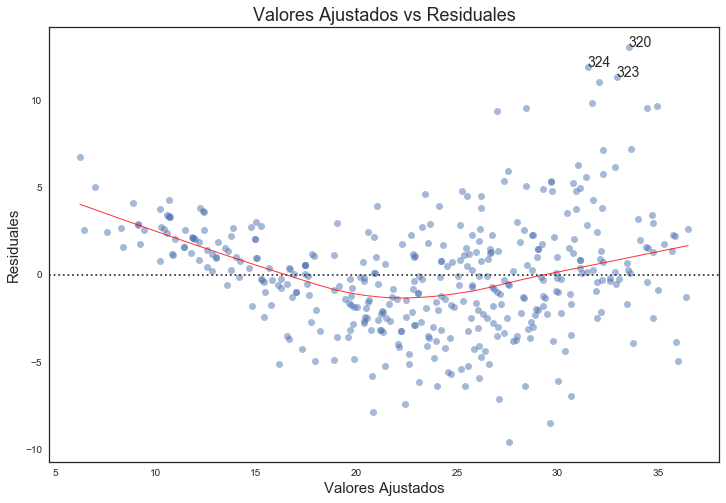

In [472]:
plt.style.use('seaborn-white')
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=datosAutos, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Valores Ajustados vs Residuales')
plot_lm_1.axes[0].set_xlabel('Valores Ajustados')
plot_lm_1.axes[0].set_ylabel('Residuales')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

### Gr√°fico de Cuantiles - QQ

El gr√°fico muestra cuan bien se ajusta la distribucci√≥n de los residuales a la distribuci√≥n normal. Esto grafica los residuales estandarizados (z-score) contra los cuantiles normales te√≥ricos. Cualquier punto que cae fuera de la l√≠nea diagonal debe considerarse para posterior investigaciones.

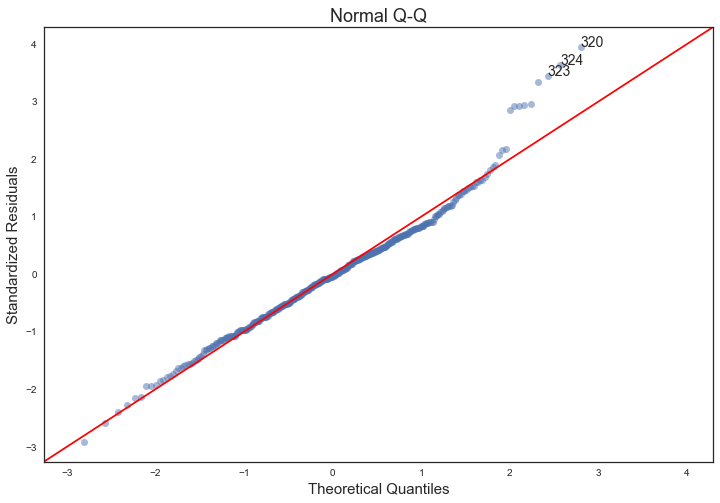

In [473]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r], model_norm_residuals[i]));

### Gr√°fico de Escala - Localizaci√≥n

Esta es otra gr√°fica de residuales, los cual muestra dispersion de los datos de forma que se pueda medir la heteroscedasticidad.

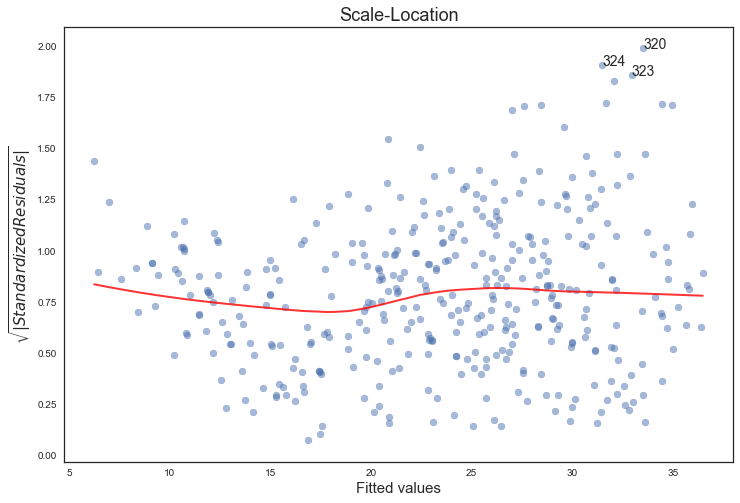

In [474]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));

### Gr√°fico de influencias o apalancamiento - Leverage

Este gr√°fico muestra si alg√∫n valor at√≠pico o outlier tiene influencia sobre el ajuste de regresi√≥n. Cualquier punto fuera del grupo o fuera de las l√≠neas de "_distancia de Cook_", podr√≠an tener efectos influenciables en el ajuste del modelo.


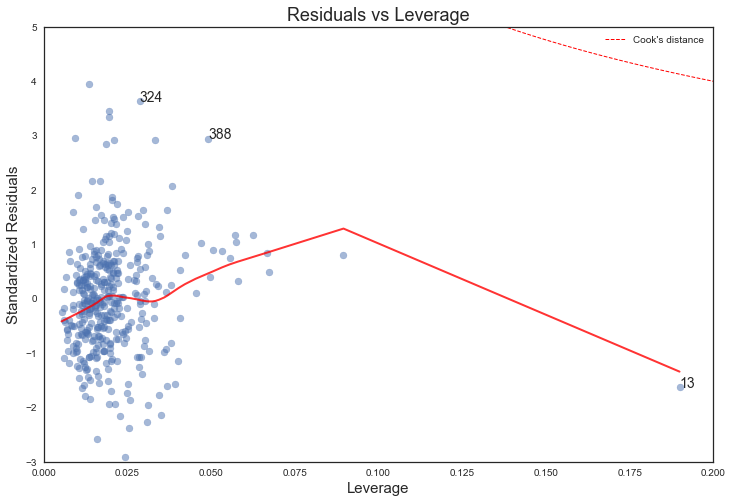

In [475]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

En algunos casos se puede tener una idea de coÃÅmo es la varianza de cada respuesta. Por ejemplo, la i-eÃÅsima respuesta podriÃÅa ser un promedio de $n_i$ observaciones originales. Si cada una de estas observaciones originales no estaÃÅ correlacionada y tiene varianza $\sigma^2$, entonces su promedio tiene una varianza $\sigma_i^2 = \sigma^2 / n$. En este caso, un remedio simple es ajustar nuestro modelo por **_miÃÅnimos cuadrados ponderados**_, con pesos proporcionales a las varianzas inversas, es decir,  $w_i = n_i$ , en este caso. La mayoriÃÅa del software de regresioÃÅn lineal permite estas ponderaciones en las observaciones.

### 4. Valores atiÃÅpicos

Un _valor atiÃÅpico_ (**outlier**) es un punto para el cual $y_i$ estaÃÅ lejos del valor predicho por el modelo. Los valores atiÃÅpicos pueden surgir por una variedad de razones, tales como el registro incorrecto de una observacioÃÅn durante la recoleccioÃÅn de los datos.

El punto rojo (observacioÃÅn 20) en el panel izquierdo de la siguiente figura ilustra un valor atiÃÅpico. La liÃÅnea soÃÅlida roja es el ajuste de regresioÃÅn de miÃÅnimos cuadrados, mientras que la liÃÅnea azul discontinua es el ajuste de miÃÅnimos cuadrados despueÃÅs de la eliminacioÃÅn del valor atiÃÅpico. En este caso, la remocioÃÅn del valor atiÃÅpico tiene poco efecto en la recta de miÃÅnimos cuadrados: no se produce casi ninguÃÅn cambio en la pendiente, y hay una reduccioÃÅn minuÃÅscula en el intercepto.

![Outliers](./assets/Outliers2.png)

Es frecuente que un valor atiÃÅpico que no tiene un valor inusual en el predictor, tenga poco efecto en el ajuste de miÃÅnimos cuadrados. Sin embargo, si un valor atiÃÅpico no tiene mucho efecto en el ajuste de miÃÅnimos cuadrados, puede causar otros problemas. Por ejemplo, en el ejemplo, el RSE es 1.09 cuando el valor atiÃÅpico se incluye en la regresioÃÅn, pero es soÃÅlo 0.77 cuando se elimina el valor atiÃÅpico. 

Dado que el RSE se utiliza para calcular todos los intervalos de confianza y los p-valores, un aumento tan dramaÃÅtico causado por un uÃÅnico punto de datos puede tener implicaciones para la interpretacioÃÅn del ajuste. De forma similar, la inclusioÃÅn del valor atiÃÅpico hace que el $R^2$ disminuya de 0,892 a 0,805.

Los graÃÅficos de residuales se pueden utilizar para identificar los valores atiÃÅpicos. En este ejemplo, el outlier es claramente visible en el graÃÅfico residual del panel central de la figura. Pero en la praÃÅctica, puede ser difiÃÅcil decidir cuaÃÅn grande debe ser un residuo antes de considerar el punto como un valor atiÃÅpico. Para resolver este problema, en lugar de graficar los residuos, podemos graficar los _**residuos estudentizados**_, los cuales se calculan dividiendo cada residual $e_i$ por su error estaÃÅndar estimado. _**Las observaciones cuyos residuos estudentizados son mayores que 3 en valor absoluto son posibles valores atiÃÅpicos**_. En el panel derecho de la figura, el residuo estudentizado del outlier es mayor que 6, mientras que para todas las demaÃÅs observaciones los residuales estudentizados caen entre -2 y 2.

Si un valor atiÃÅpico es debido a un error en la recoleccioÃÅn o registro de datos, entonces una solucioÃÅn es simplemente eliminar la observacioÃÅn. Sin embargo, se debe tener cuidado, ya que un valor atiÃÅpico puede indicar una deficiencia en el modelo, como la falta de un predictor.

### 5. Puntos de alta influncia o apalancamiento - Leverage

Acabamos de ver que los valores atiÃÅpicos son observaciones para las cuales la respuesta $y_i$ es inusual dado el predictor $x_i$. En contraste, las observaciones con alto leverage (apalancamiento) tienen un valor inusual para $x_i$. Por ejemplo, la observacioÃÅn 41 en el panel izquierdo de la siguiente figura tiene un alto grado de leverage, ya que el valor predictor para esta observacioÃÅn es grande con respecto a las otras observaciones. (ObseÃÅrvese que los datos que se muestran son los mismos que los mostrados en la figura anterior, pero con la adicioÃÅn de una sola observacioÃÅn de alto leverage). La liÃÅnea soÃÅlida roja es el ajuste por miÃÅnimos cuadrados de los datos, mientras que la liÃÅnea azul discontinua es el ajuste producido cuando se retira la observacioÃÅn 41.

![Leverage](./assets/Leverage.png)

Comparando los paneles de la izquierda de ambas figuras, observamos que eliminar la observacioÃÅn de alto leverage tiene un impacto mucho maÃÅs sustancial en la liÃÅnea de miÃÅnimos cuadrados que la eliminacioÃÅn del valor atiÃÅpico. De hecho, las observaciones de alto leverage tienden a tener un impacto considerable en la recta de regresioÃÅn estimada. Es preocupante que la recta de miÃÅnimos cuadrados esteÃÅ fuertemente afectada por soÃÅlo un par de observaciones, ya que cualquier problema con estos puntos puede invalidar todo el ajuste. Por esta razoÃÅn, es importante identificar observaciones de alto leverage.

En una regresioÃÅn lineal simple, las observaciones de alto leverage son bastante faÃÅciles de identificar, ya que simplemente podemos buscar observaciones para las cuales el valor del predictor estaÃÅ fuera del rango normal de las observaciones de $X$. Pero en una regresioÃÅn lineal muÃÅltiple con muchos predictores, es posible tener una observacioÃÅn que esteÃÅ bien dentro del rango de los valores de cada predictor individual, pero que es inusual en teÃÅrminos del conjunto completo de predictores. Un ejemplo se muestra en el panel central de la figura, para un conjunto de datos con dos predictores, $X_1$ y $X_2$. La mayoriÃÅa de los valores de prediccioÃÅn de las observaciones caen dentro de la elipse de rayas azules, pero la observacioÃÅn roja estaÃÅ bien afuera de este rango. Pero ni su valor para $X_1$ ni su valor para $X_2$ es inusual. AsiÃÅ que si examinamos soÃÅlo $X_1$ o simplemente $X_2$, no notaremos este punto de alto leverage. Este problema es maÃÅs pronunciado en regresiones muÃÅltiples con maÃÅs de dos predictores, porque no hay una manera simple de gr√°ficar todas las dimensiones de los datos simultaÃÅneamente.

Para cuantificar el leverage de una observacioÃÅn, se calcula el estadiÃÅstico de leverage. Un gran valor de este estadiÃÅstico indica una observacioÃÅn con alto leverage. Para una regresioÃÅn lineal simple,

$$ h_i = \frac{1}{n} + \frac{ (x_i - \bar x)^2 }{ \sum_{i'=1}^n (x_{i'} - \bar x)^2 }$$

De esta ecuacioÃÅn se desprende que $h_i$ aumenta con la distancia $x_i$ a $\bar x$. Hay una extensioÃÅn simple de $h_i$ al caso de los predictores muÃÅltiples, _aunque no proporcionamos la foÃÅrmula aquiÃÅ_. El estadiÃÅstico de leverage $h_i$ estaÃÅ siempre entre 1/n y 1, y el leverage promedio para todas las observaciones es siempre igual a (p+1)/n. Por lo tanto, si una observacioÃÅn dada tiene un estadiÃÅstico de leverage que excede en gran medida (p+1)/n, entonces podemos sospechar que el punto correspondiente tiene un alto apalancamiento.

El panel derecho de la figura proporciona una graÃÅfica de los _**residuos estudentizados**_ versus $h_i$ para los datos en el panel izquierdo de la figura. La observacioÃÅn 41 se destaca con un estadiÃÅstico de leverage muy alto, asiÃÅ como un alto residuo estudentizado. En otras palabras, es una observacioÃÅn atiÃÅpica, asiÃÅ como una observacioÃÅn de alto leverage. _**Esta es una combinacioÃÅn particularmente peligrosa!**_ Esta graÃÅfica tambieÃÅn revela la razoÃÅn por la que la observacioÃÅn 20 tuvo relativamente poco efecto sobre el ajuste de miÃÅnimos cuadrados en la figura de los outliers, tiene un bajo nivel de leverage.

### 6. Colinealidad

La _colinealidad_ se refiere a la situacioÃÅn en la cual dos o maÃÅs variables predictoras estaÃÅn estrechamente relacionadas entre siÃÅ. El concepto de colinealidad se ilustra en la siguiente figura utilizando el conjunto de datos de Default. En el panel izquierdo de la figura, los predictores **liÃÅmite** (de creÃÅdito) y **edad** parecen no tener una relacioÃÅn obvia. Por el contrario, en el panel de la derecha de la figura, los predictores **liÃÅmite** y **calificacioÃÅn** (crediticia) estaÃÅn muy correlacionados entre siÃÅ, y decimos que son colineales. La presencia de colinealidad puede llegar a crear problemas en el contexto de regresioÃÅn, ya que puede ser difiÃÅcil separar los efectos individuales de las variables colineales sobre la variable respuesta.

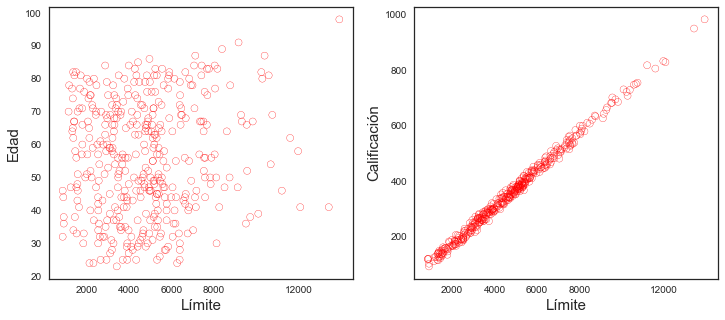

In [476]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(datosCredito.Limit, datosCredito.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Edad')

# Right plot
ax2.scatter(datosCredito.Limit, datosCredito.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Calificaci√≥n')

for ax in fig.axes:
    ax.set_xlabel('L√≠mite')
    ax.set_xticks([2000,4000,6000,8000,12000])

En otras palabras, dado que liÃÅmite y calificacioÃÅn tienden a aumentar o disminuir juntos, puede ser difiÃÅcil determinar coÃÅmo cada uno estaÃÅ asociado por separado con la respuesta, **saldo**. La siguiente figura ilustra algunas de las dificultades que puede producir la colinealidad. El panel izquierdo de la figura es un diagrama de contorno del RSS asociado con diferentes estimaciones posibles de los coeficientes para la regresioÃÅn del saldo sobre el liÃÅmite y la edad. Cada elipse representa un conjunto de coeficientes que corresponden al mismo RSS, para las elipses maÃÅs cercanas al centro la RSS toma los valores maÃÅs bajos. Los puntos negros y las liÃÅneas discontinuas asociadas representan las estimaciones de los coeficientes que dan como resultado la RSS maÃÅs pequenÃÉa posible; en otras palabras, eÃÅstas son las estimaciones de miÃÅnimos cuadrados.

Los ejes para los predictores liÃÅmite y edad se han escalado de modo que la graÃÅfica incluya las estimaciones posibles del coeficiente que son hasta cuatro errores estaÃÅndar en cualquier lado de las estimaciones de los miÃÅnimos cuadrados. De esta manera, la graÃÅfica incluye todos los valores plausibles para los coeficientes. Por ejemplo, vemos que el verdadero coeficiente de liÃÅmite es casi seguramente un valor entre 0,15 y 0,20.

En contraste, el panel derecho de la figura muestra graÃÅficas de contorno del RSS asociadas con posibles estimaciones de coeficientes para la regresioÃÅn del saldo sobre el liÃÅmite y la calificacioÃÅn, que sabemos que son altamente colineales. Ahora los contornos recorren una estrecha regioÃÅn; existe una amplia gama de valores para las estimaciones de coeficientes que resultan en valores iguales para RSS.

Por lo tanto, un pequenÃÉo cambio en los datos podriÃÅa hacer que el par de valores de coeficientes que producen el RSS maÃÅs pequenÃÉo -es decir, las estimaciones de miÃÅnimos cuadrados- se mueva a cualquier parte a lo largo de esta zona. Esto da lugar a una gran incertidumbre en las estimaciones de los coeficientes. ObseÃÅrvese que la escala para el coeficiente de liÃÅmite ahora es de aproximadamente -0.2 a 0.2; Esto es un aumento de ocho veces sobre el rango plausible del coeficiente de liÃÅmite en la regresioÃÅn con la edad. Curiosamente, a pesar de que los coeficientes de liÃÅmite y calificacioÃÅn ahora tienen mucha maÃÅs incertidumbre individual, seguramente se encontraraÃÅn en alguna parte en esta regioÃÅn del contorno. Por ejemplo, no esperariÃÅamos que el valor real de los coeficientes de liÃÅmite y de calificacioÃÅn sea -0.1 y 1 respectivamente, aun cuando tal valor sea plausible para cada coeficiente individualmente.


In [478]:
from sklearn.preprocessing import scale
y = datosCredito.Balance

# Regression for left plot
X = datosCredito[['Age', 'Limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = datosCredito[['Rating', 'Limit']].as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.015
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[ 2.20167217  0.02451438]


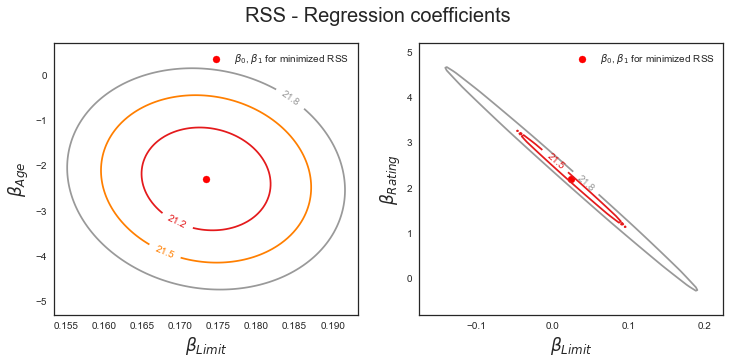

In [480]:
# Crear malla de coordenadas
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(datosCredito.Limit.astype('float'), with_std=False)
Age_scaled = scale(datosCredito.Age.astype('float'), with_std=False)
Rating_scaled = scale(datosCredito.Rating.astype('float'), with_std=False)

# C√°lcular valores Z (RSS) basados en la malla de coeficientes
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled + Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled + Y2[i,j]*Rating_scaled))**2).sum()/1000000
    
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

Dado que la colinealidad reduce la precisioÃÅn de las estimaciones de los coeficientes de regresioÃÅn, hace que el error estaÃÅndar para  $\hat \beta_j$ crezca. Recordemos que el estadiÃÅstico t para cada predictor se calcula dividiendo  $\hat \beta_j$  por su error estaÃÅndar. En consecuencia, la colinealidad produce una _disminucioÃÅn en el estadiÃÅstico t_. Como resultado, en presencia de colinealidad, podemos no rechazar $H_0$: $\beta_j=0$. Esto significa que la potencia de la prueba de hipoÃÅtesis, es decir, la probabilidad de detectar correctamente un coeficiente no nulo, se reduce por la colinealidad.

La siguiente tabla compara las estimaciones de los coeficientes obtenidas en dos modelos de regresioÃÅn muÃÅltiple separados. El primero es una regresioÃÅn del saldo sobre edad y liÃÅmite, y el segundo es una regresioÃÅn del saldo sobre calificacioÃÅn y liÃÅmite.

In [495]:
reg1 = smf.ols('Balance ~ Age + Limit', datosCredito).fit() # Model 1
reg2 = smf.ols('Balance ~ Rating + Limit', datosCredito).fit() #¬†Model 2
print(reg1.summary().tables[1])
print(reg2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150


En la primera regresioÃÅn, tanto la edad como el liÃÅmite son muy significativos con p-valores muy pequenÃÉos. En el segundo, la colinealidad entre liÃÅmite y calificacioÃÅn ha provocado que el error estaÃÅndar para la estimacioÃÅn del coeficiente liÃÅmite aumentara en un factor de 12 y el p-valor aumentara a 0.701. En otras palabras, la importancia de la variable liÃÅmite ha sido enmascarada debido a la presencia de colinealidad.

Para evitar tal situacioÃÅn, es deseable identificar y abordar posibles problemas de colinealidad mientras se ajusta al modelo. _**Una manera simple de detectar colinealidad es mirar la matriz de correlacioÃÅn de los predictores**_. Un elemento de esta matriz que es grande en valor absoluto indica un par de variables altamente correlacionadas, y por lo tanto un problema de colinealidad en los datos. _Desafortunadamente, no todos los problemas de colinealidad pueden ser detectados mediante la inspeccioÃÅn de la matriz de correlacioÃÅn_: es posible que exista una colinealidad entre tres o maÃÅs variables incluso si ninguÃÅn par de variables tiene una correlacioÃÅn particularmente alta. Llamamos a esta situacioÃÅn _multicolinealidad_.

### F√°ctor de inflacioÃÅn de la varianza - VIF

En lugar de inspeccionar la matriz de correlacioÃÅn, _**una forma mejor de evaluar la multicolinealidad**_ es calcular el **factor de inflacioÃÅn de la varianza (VIF)**. El valor maÃÅs pequenÃÉo posible para el VIF es 1, lo que indica la ausencia total de colinealidad. TiÃÅpicamente en la praÃÅctica hay una pequenÃÉa cantidad de colinealidad entre los predictores. _Como regla general, un valor **VIF que excede de 5 o 10** indica una cantidad problemaÃÅtica de colinealidad_. El VIF para cada variable se puede calcular usando la foÃÅrmula:

$$ VIF(\hat \beta_j) = \frac{1}{(1 - R_{X_j | X_-j}^2)} $$


donde $R_{X_j | X_-j}^2$ es el $R^2$ de una regresioÃÅn de $X_j$ sobre los demaÃÅs predictores. Si $R_{X_j | X_-j}^2$ es cercano a 1, la colinealidad estaÃÅ presente , y el VIF seraÃÅ grande.

En los datos de creÃÅdito, una regresioÃÅn del saldo sobre edad, calificacioÃÅn y liÃÅmite indica que los predictores tienen valores de VIF de 1,01, 160,67 y 160,59. Como sospechaÃÅbamos, ¬°hay una considerable colinealidad en los datos!

In [518]:
est_Age = smf.ols('Age ~ Rating + Limit', datosCredito).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', datosCredito).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', datosCredito).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.01138468607
160.668300959
160.592879786


Cuando se enfrenta al problema de la colinealidad, existen dos soluciones simples. La primera es eliminar una de las variables problemaÃÅticas de la regresioÃÅn. Normalmente esto puede hacerse sin mucho compromiso con el ajuste de regresioÃÅn, ya que la presencia de la colinealidad implica que la informacioÃÅn que esta variable proporciona sobre la respuesta es redundante en presencia de las otras variables. Por ejemplo, si se regresa el saldo sobre la edad y el liÃÅmite, sin el predictor calificacioÃÅn, entonces los valores de VIF resultantes se acercan al valor miÃÅnimo posible de 1 y el $R^2$ desciende de 0,754 a 0,75. Por lo tanto, la salida de la calificacioÃÅn del conjunto de predictores ha resuelto el problema de la colinealidad sin comprometer el ajuste.

La segunda solucioÃÅn consiste en combinar las variables colineales en un uÃÅnico predictor. Por ejemplo, podriÃÅamos tomar el promedio de versiones estandarizadas de liÃÅmite y calificacioÃÅn para crear una nueva variable que mida la _solvencia crediticia_.

In [515]:
#¬†Es preferible hacerlo de esta manera si se cuentan con muchas variables
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import statsmodels.api as sm

# X = datosCredito[['Age','Rating','Limit']] #¬†Para que funcione es necesario una columna con el intercepto y valores 1.0
# y = datosCredito.Balance
#datacopy.head()

# Break into left and right hand side; y and X
y, X = dmatrices("Balance ~ Age + Rating + Limit", data=datosCredito, return_type="dataframe")

# para cada Xi, c√°lcular VIF y guardarlo en un dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor   features
0        23.8  Intercept
1         1.0        Age
2       160.7     Rating
3       160.6      Limit

In [517]:
X.head()

Intercept   Age  Rating   Limit
1        1.0  34.0   283.0  3606.0
2        1.0  82.0   483.0  6645.0
3        1.0  71.0   514.0  7075.0
4        1.0  36.0   681.0  9504.0
5        1.0  68.0   357.0  4897.0

[< Regresi√≥n Lineal Simple](Regresion%20Lineal.ipynb) | [Inicio](Aprendizaje%20Estadistico%20y%20Automatico%20con%20Python.ipynb) | [Clasificaci√≥n >](Clasificacion.ipynb)

Informaci√≥n de soporte adicional en Ingles.

- [Slides de Presentaci√≥n en PDF](https://lagunita.stanford.edu/c4x/HumanitiesScience/StatLearning/asset/linear_regression.pdf)
- [Multiple Linear Regression and Interpreting Regression Coefficients](https://www.youtube.com/watch?v=1hbCJyM9ccs) (Video - duraci√≥n 15:38)